# Breast Cancer Wisconsin (Diagnostic)
### Disusun oleh : Santriana Pratama

### Import Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

### Load Dataset

In [36]:
df_cancer = pd.read_csv('~/Documents/Machine Learning/Final Project/data.csv')


#### Justifikasi Dataset
- ID Number = merupakan nomor identitas pasien
- Diagnosis = merupakan jenis kanker yang diidap oleh pasien (M=Malignant, B=Benign)
- radius = jarak dari pusat ke titik-titik pada keliling
- texture = nilai gray-scale
- permeter = keliling
- area = luas penampan kanker
- smoothness = variasi lokal dalam panjang radius
- compactness = dari nilai (perimeter^2 / area - 1.0)
- concavity = keparahan bagian cekung dari kontur
- concave points = jumlah bagian cekung dari kontur
- symmetry = bentuk dari jenis kanker
- fractal dimension = dimensi dari benda geometris yang kasar pada segala skala, dan terlihat dapat "dibagi-bagi" dengan cara yang radikal. (coastline approximation - 1)

In [37]:
print('Total Rows: ', df_cancer.shape[0])
print('Total Columns: ', df_cancer.shape[1])

Total Rows:  569
Total Columns:  33


In [38]:
df_cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
df_cancer.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [40]:
df_cancer.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
440,909411,B,10.970,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,...,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.15550,0.2540,0.09532,NaN
94,862028,M,15.060,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,...,24.23,123.50,1025.0,0.1551,0.4203,0.5203,0.21150,0.2834,0.08234,NaN
151,871001502,B,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,...,29.72,58.08,249.8,0.1630,0.4310,0.5381,0.07879,0.3322,0.14860,NaN
145,869476,B,11.900,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.03003,...,16.51,86.26,509.6,0.1424,0.2517,0.0942,0.06042,0.2727,0.10360,NaN
508,915452,B,16.300,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,...,17.76,109.80,928.2,0.1354,0.1361,0.1947,0.13570,0.2300,0.07230,NaN


In [41]:
df_cancer.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [42]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
# mengecek apakah terdapat missing value pada dataset
df_cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [44]:
np.unique(df_cancer['Unnamed: 32'])

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [45]:
# dikarenakan ID Number dan Unnamed: 32 bukan merupakan feature yang dapat mempengaruhi model
# dan pada kolom Unnamed: 32 seluruhnya merupakan missing value, maka sebaiknya kita drop kedua kolom tersebut.
df_cancer.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [46]:
df_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Dari hasil deskripsi di atas, dapat dilihat bahwa data memiliki skala yang berbeda antara satu fitur dengan yang lainnya, maka kita perlu melakukan Scaler pada tahap Data Preprocessing.

### Data Visualization

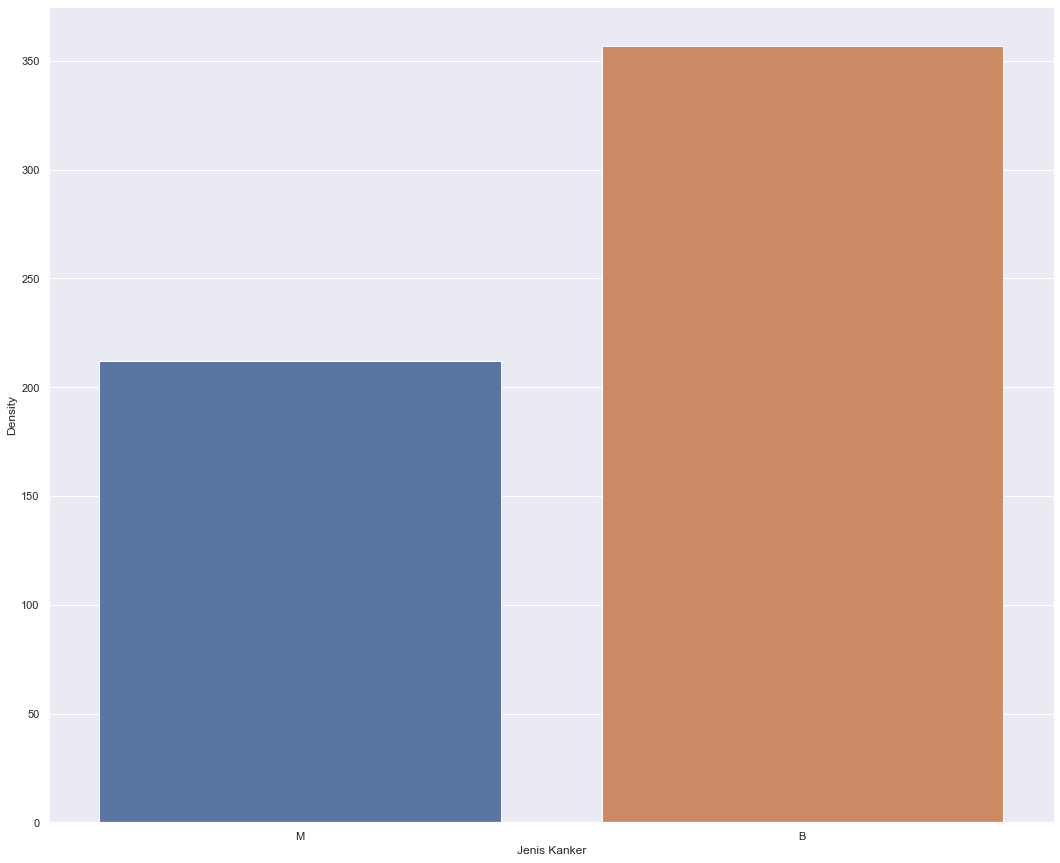

B    357
M    212
Name: diagnosis, dtype: int64

In [47]:
# melihat persebaran data dari target model
sns.countplot(x=df_cancer['diagnosis'])
plt.xlabel('Jenis Kanker')
plt.ylabel('Density')
plt.show()
df_cancer['diagnosis'].value_counts()

Pada hasil plot di atas dapat disimpulkan bahwa data sedikit tidak seimbang (imbalance data), dengan begitu saya memutuskan untuk tidak melakukan penyesuaian data.

In [48]:
# mengecek nilai mean untuk kedua target tersebut
df_cancer.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Dari hasil pengelompokan tersebut dapat disimpulkan bahwa kanker berjenis Malignant memiliki nilai rata - rata seluruh feature yang lebih tinggi dibandingkan dengan kanker yang berjenis Benign

In [49]:
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
features_SE = ['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se']
features_worst = ['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

<AxesSubplot:xlabel='fractal_dimension_mean', ylabel='Density'>

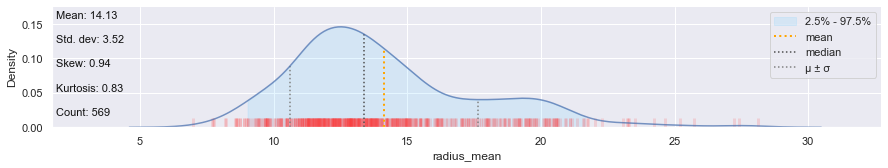

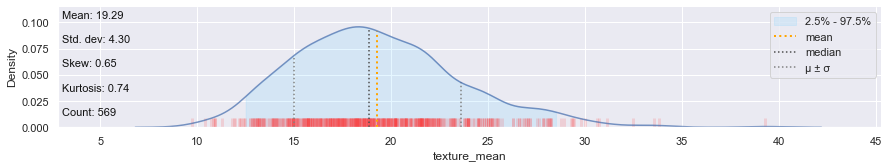

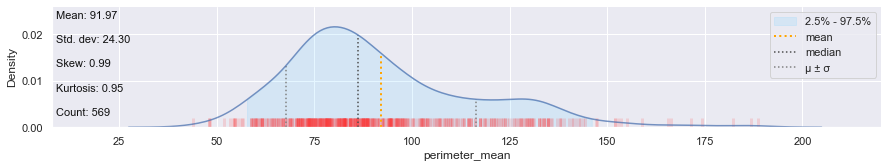

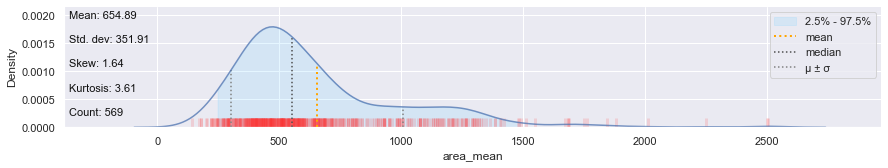

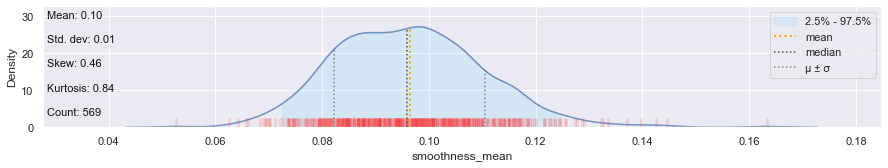

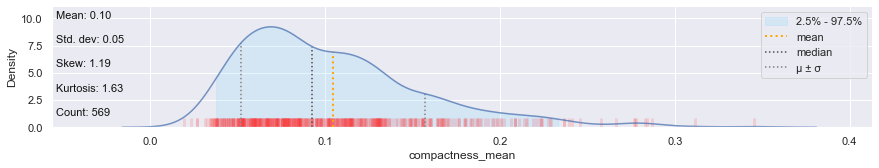

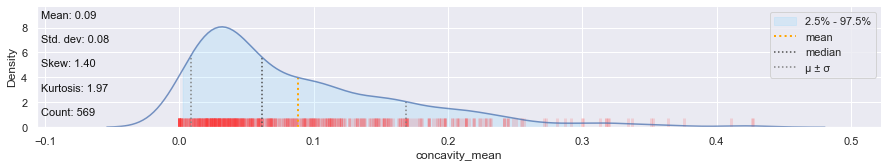

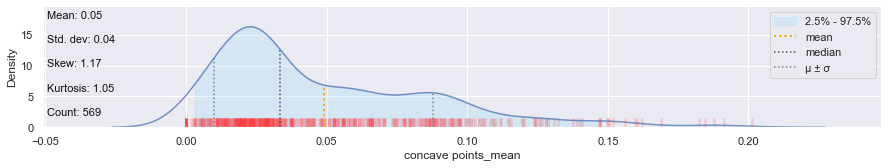

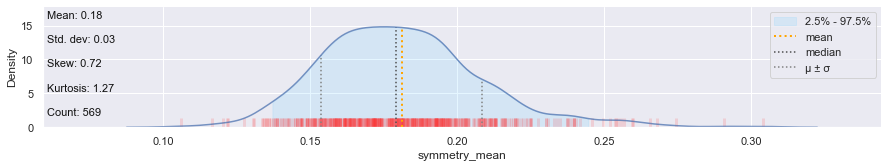

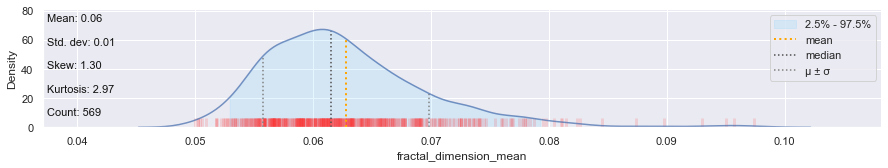

In [50]:
klib.dist_plot(df_cancer[features_mean])

#### Insight:
- Pada setiap fitur yang terdapat pada features_mean menunjukan keseluruhan data memiliki persebaran yang cukup baik, hal ini ditunjukkan oleh data yang memiliki satu buah puncak yang berarti nilai kurtosis mendekati nilai ideal (3) dan memiliki nilai skewness yang mendekati kondisi ideal juga (0).

<AxesSubplot:xlabel='fractal_dimension_se', ylabel='Density'>

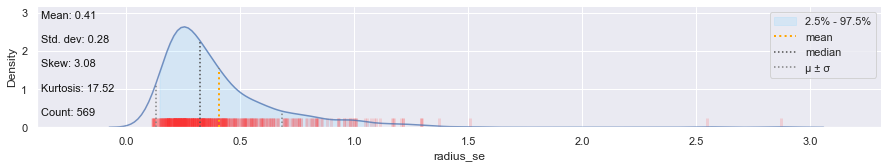

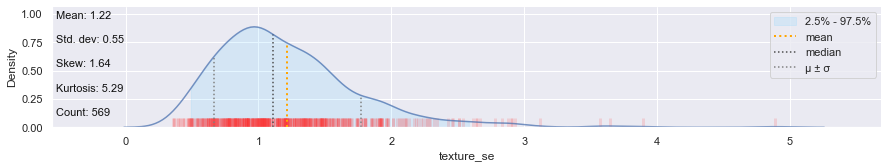

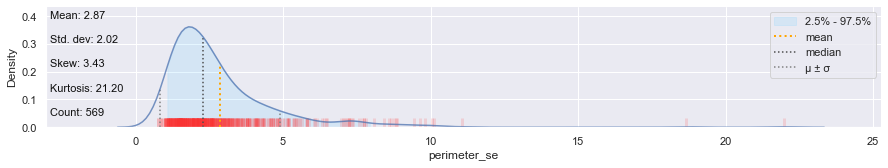

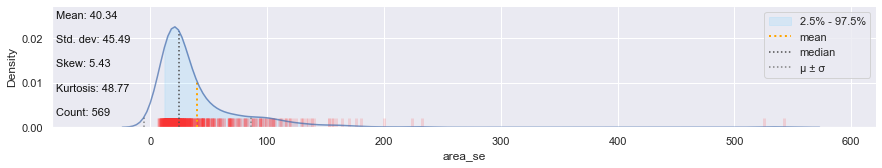

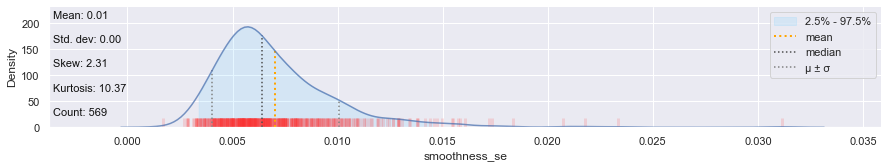

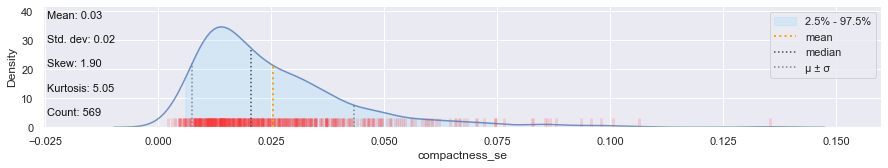

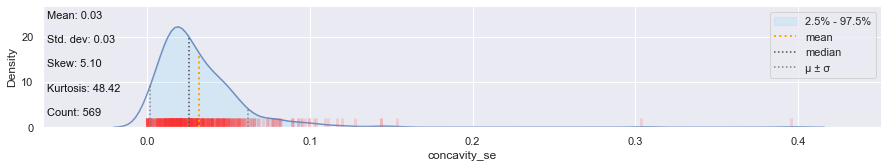

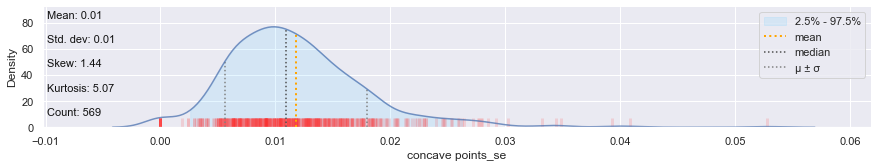

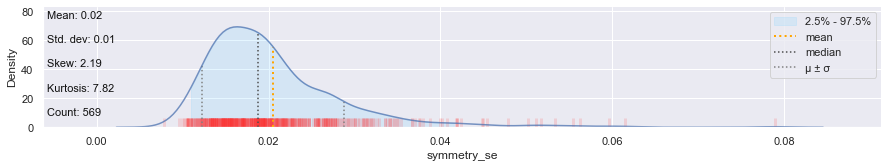

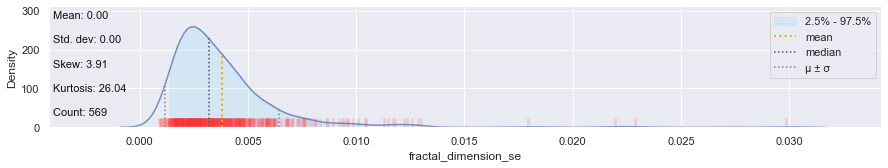

In [51]:
klib.dist_plot(df_cancer[features_SE])

#### Insight:
- Pada setiap fitur yang terdapat pada features_SE menunjukan keseluruhan data memiliki persebaran yang buruk, hal ini ditunjukkan oleh nilai kurtosis yang cukup tinggi yang berarti data tertumpuk pada satu titik meskipun pada plot ditunjukkan bahwa hanya terdapat satu buah puncak. Selain itu, nilai dari skewness dari setiap fitur memiliki nilai positif yang cukup tinggi, yang berarti grafik menceng ke kanan.

<AxesSubplot:xlabel='fractal_dimension_worst', ylabel='Density'>

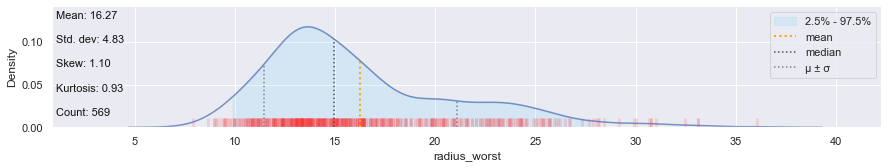

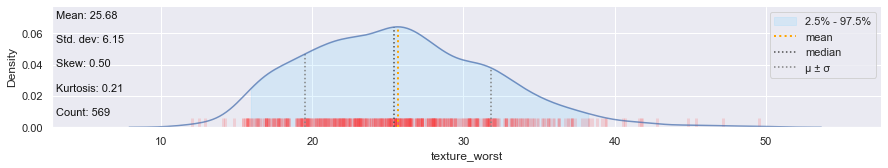

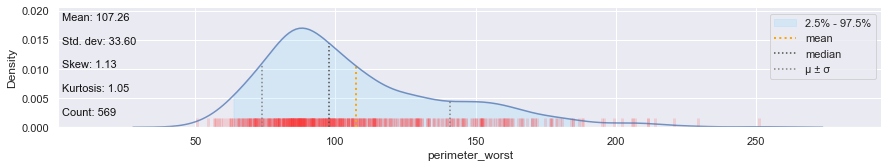

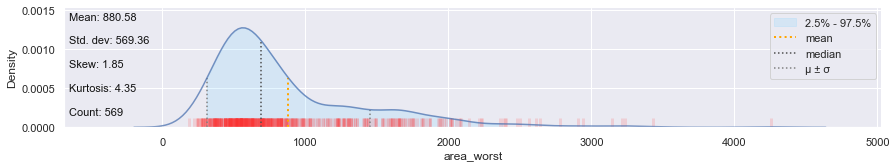

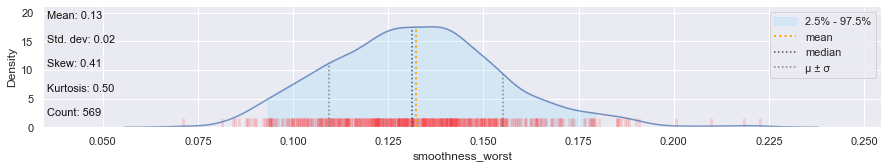

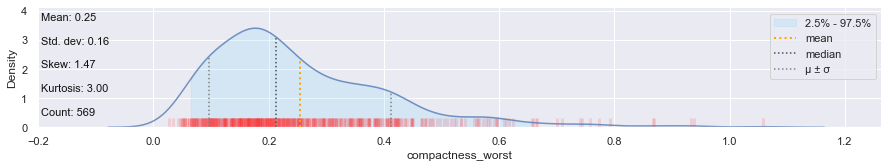

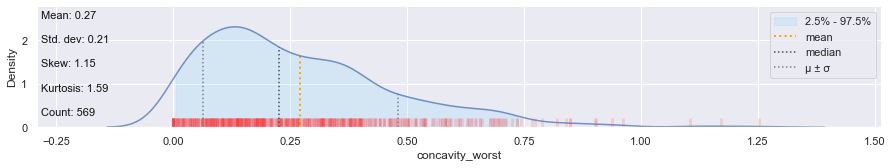

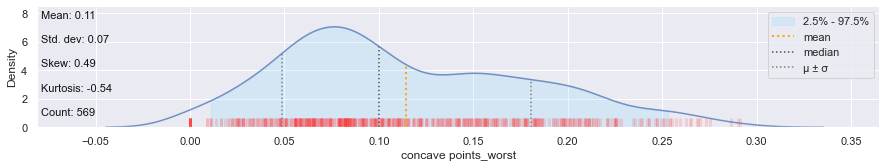

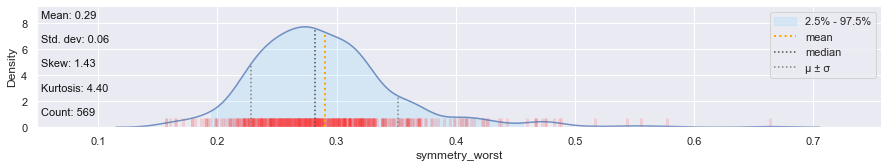

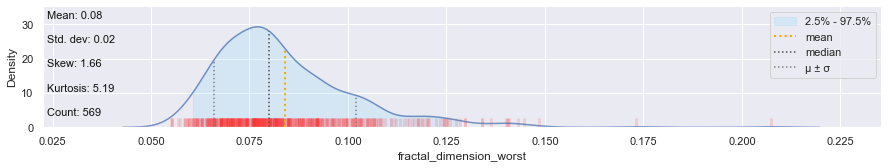

In [52]:
klib.dist_plot(df_cancer[features_worst])

#### Insight:
- Pada setiap fitur yang terdapat pada features_worst menunjukan keseluruhan data memiliki persebaran yang cukup baik, hal ini ditunjukkan oleh nilai kurtosis mendekati nilai ideal (3) dan memiliki nilai skewness yang mendekati kondisi ideal juga (0). Akan tetapi, pada fitur radius_worst, texture_worst, dan smoothness_worst menunjukan persebaran data yang kurang baik dikarenakan nilai dari kurtosis yang cukup rendah, sehingga persebaran data tidak terpusat di suatu rentang nilai tertentu.

Setelah diketahui karakteristik dari masing - masing persebaran data fitur, dapat disimpulkan bahwa diperlukan log transform untuk membuat distribusi yang sangat miring (highly skewed) menjadi tidak terlalu miring. Log transform dapat membuat pola dalam data sehingga lebih dapat diinterpretasikan dan untuk membantu memenuhi asumsi statistik inferensial.

In [53]:
def log_transform(col):
    return np.log(col[0])

df_cancer["compactness_mean"]=df_cancer[["compactness_mean"]].apply(log_transform, axis=1)
df_cancer["concavity_mean"]=df_cancer[["concavity_mean"]].apply(log_transform, axis=1)
df_cancer["concave points_mean"]=df_cancer[["concave points_mean"]].apply(log_transform, axis=1)
df_cancer["radius_se"]=df_cancer[["radius_se"]].apply(log_transform, axis=1)
df_cancer["perimeter_se"]=df_cancer[["perimeter_se"]].apply(log_transform, axis=1)
df_cancer["area_se"]=df_cancer[["area_se"]].apply(log_transform, axis=1)
df_cancer["smoothness_se"]=df_cancer[["smoothness_se"]].apply(log_transform, axis=1)
df_cancer["compactness_se"]=df_cancer[["compactness_se"]].apply(log_transform, axis=1)
df_cancer["concavity_se"]=df_cancer[["concavity_se"]].apply(log_transform, axis=1)
df_cancer["symmetry_se"]=df_cancer[["symmetry_se"]].apply(log_transform, axis=1)
df_cancer["fractal_dimension_se"]=df_cancer[["fractal_dimension_se"]].apply(log_transform, axis=1)
df_cancer["area_worst"]=df_cancer[["area_worst"]].apply(log_transform, axis=1)
df_cancer["compactness_worst"]=df_cancer[["compactness_worst"]].apply(log_transform, axis=1)
df_cancer["concavity_worst"]=df_cancer[["concavity_worst"]].apply(log_transform, axis=1)

<ipython-input-53-8162e672f27d>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(col[0])


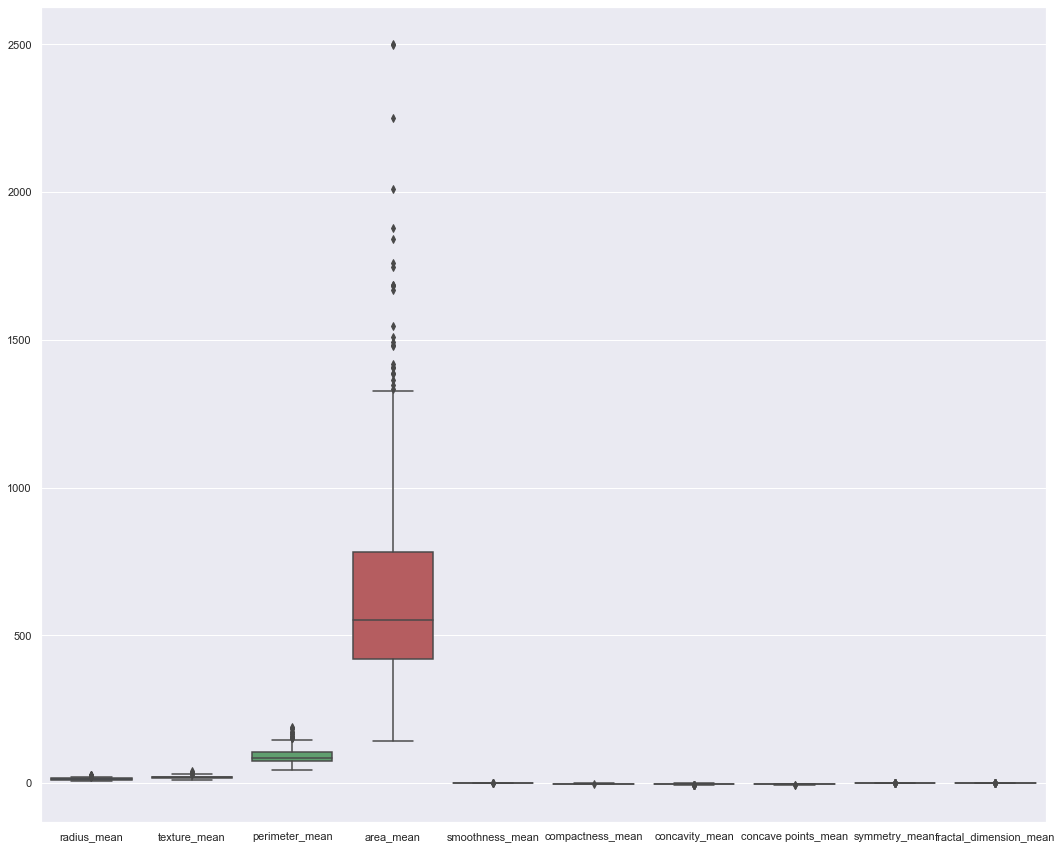

In [54]:
sns.set(rc={'figure.figsize':(18,15)})
sns.boxplot(data=df_cancer[features_mean])
plt.show()

#### Insight:
- pada boxplot ditunjukkan bahwa setiap fitur pada features_mean memiliki nilai outlier, dengan pemilik nilai outlier terbanyak terdapat pada fitur area_mean.

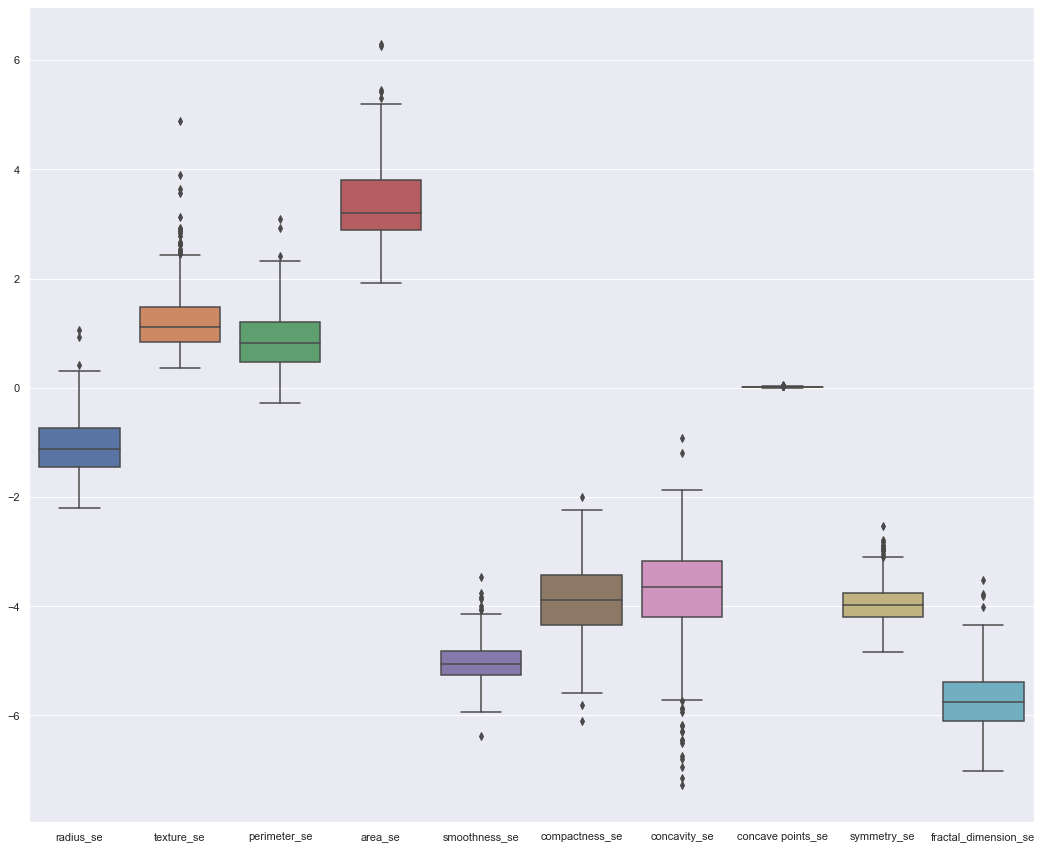

In [55]:
sns.set(rc={'figure.figsize':(18,15)})
sns.boxplot(data=df_cancer[features_SE])
plt.show()

#### Insight:
- pada boxplot ditunjukkan bahwa setiap fitur pada features_SE memiliki nilai outlier, dengan pemilik nilai outlier terbanyak terdapat pada fitur area_se.

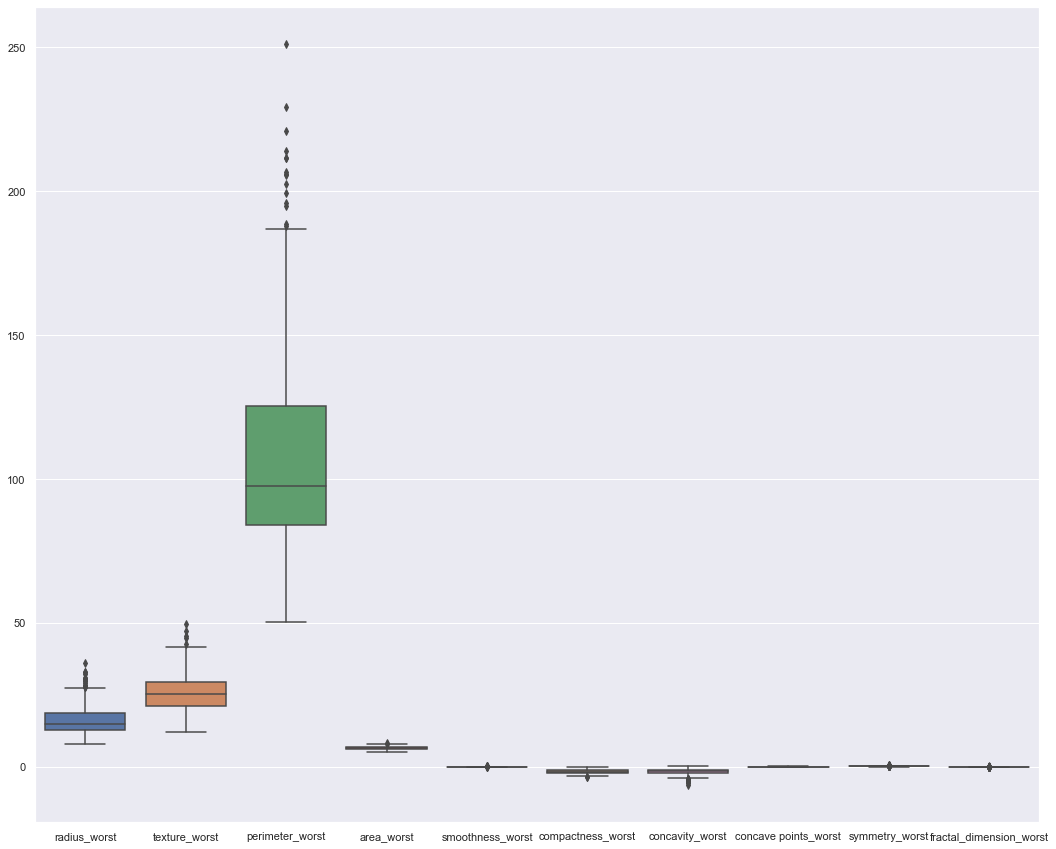

In [56]:
sns.set(rc={'figure.figsize':(18,15)})
sns.boxplot(data=df_cancer[features_worst])
plt.show()

#### Insight:
- pada boxplot ditunjukkan bahwa setiap fitur pada features_worst memiliki nilai outlier, dengan pemilik nilai outlier terbanyak terdapat pada fitur area_worst.

#### Multi Variable Analysis

##### Melakukan pengolahan Data Kategorical pada Target
melakukan one-hot encoding pada data Target

In [57]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(df_cancer['diagnosis'])
df_cancer['target'] = labels
df_cancer.drop(columns='diagnosis', axis=1, inplace=True)
# cancer_dummies = pd.get_dummies(df_cancer['diagnosis'], prefix='cancer')

In [58]:
df_cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,-1.281574,-1.203640,-1.916643,0.2419,0.07871,...,17.33,184.60,7.610358,0.1622,-0.407066,-0.339818,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,-2.542875,-2.442997,-2.656834,0.1812,0.05667,...,23.41,158.80,7.578657,0.1238,-1.678788,-1.420472,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,-1.833207,-1.622523,-2.056507,0.2069,0.05999,...,25.53,152.50,7.443664,0.1444,-0.856843,-0.797619,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,-1.259133,-1.421300,-2.251892,0.2597,0.09744,...,26.50,98.87,6.341593,0.2098,-0.143524,-0.375567,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,-2.018911,-1.619488,-2.260484,0.1809,0.05883,...,16.67,152.20,7.362011,0.1374,-1.584745,-0.916291,0.1625,0.2364,0.07678,1


In [59]:
# pca = PCA(n_components=1)
# principalComponents = pca.fit_transform(cancer_dummies)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['PCA_Cancer'])

In [60]:
# df_cancer_clear = pd.concat([df_cancer, principalDf], axis=1)

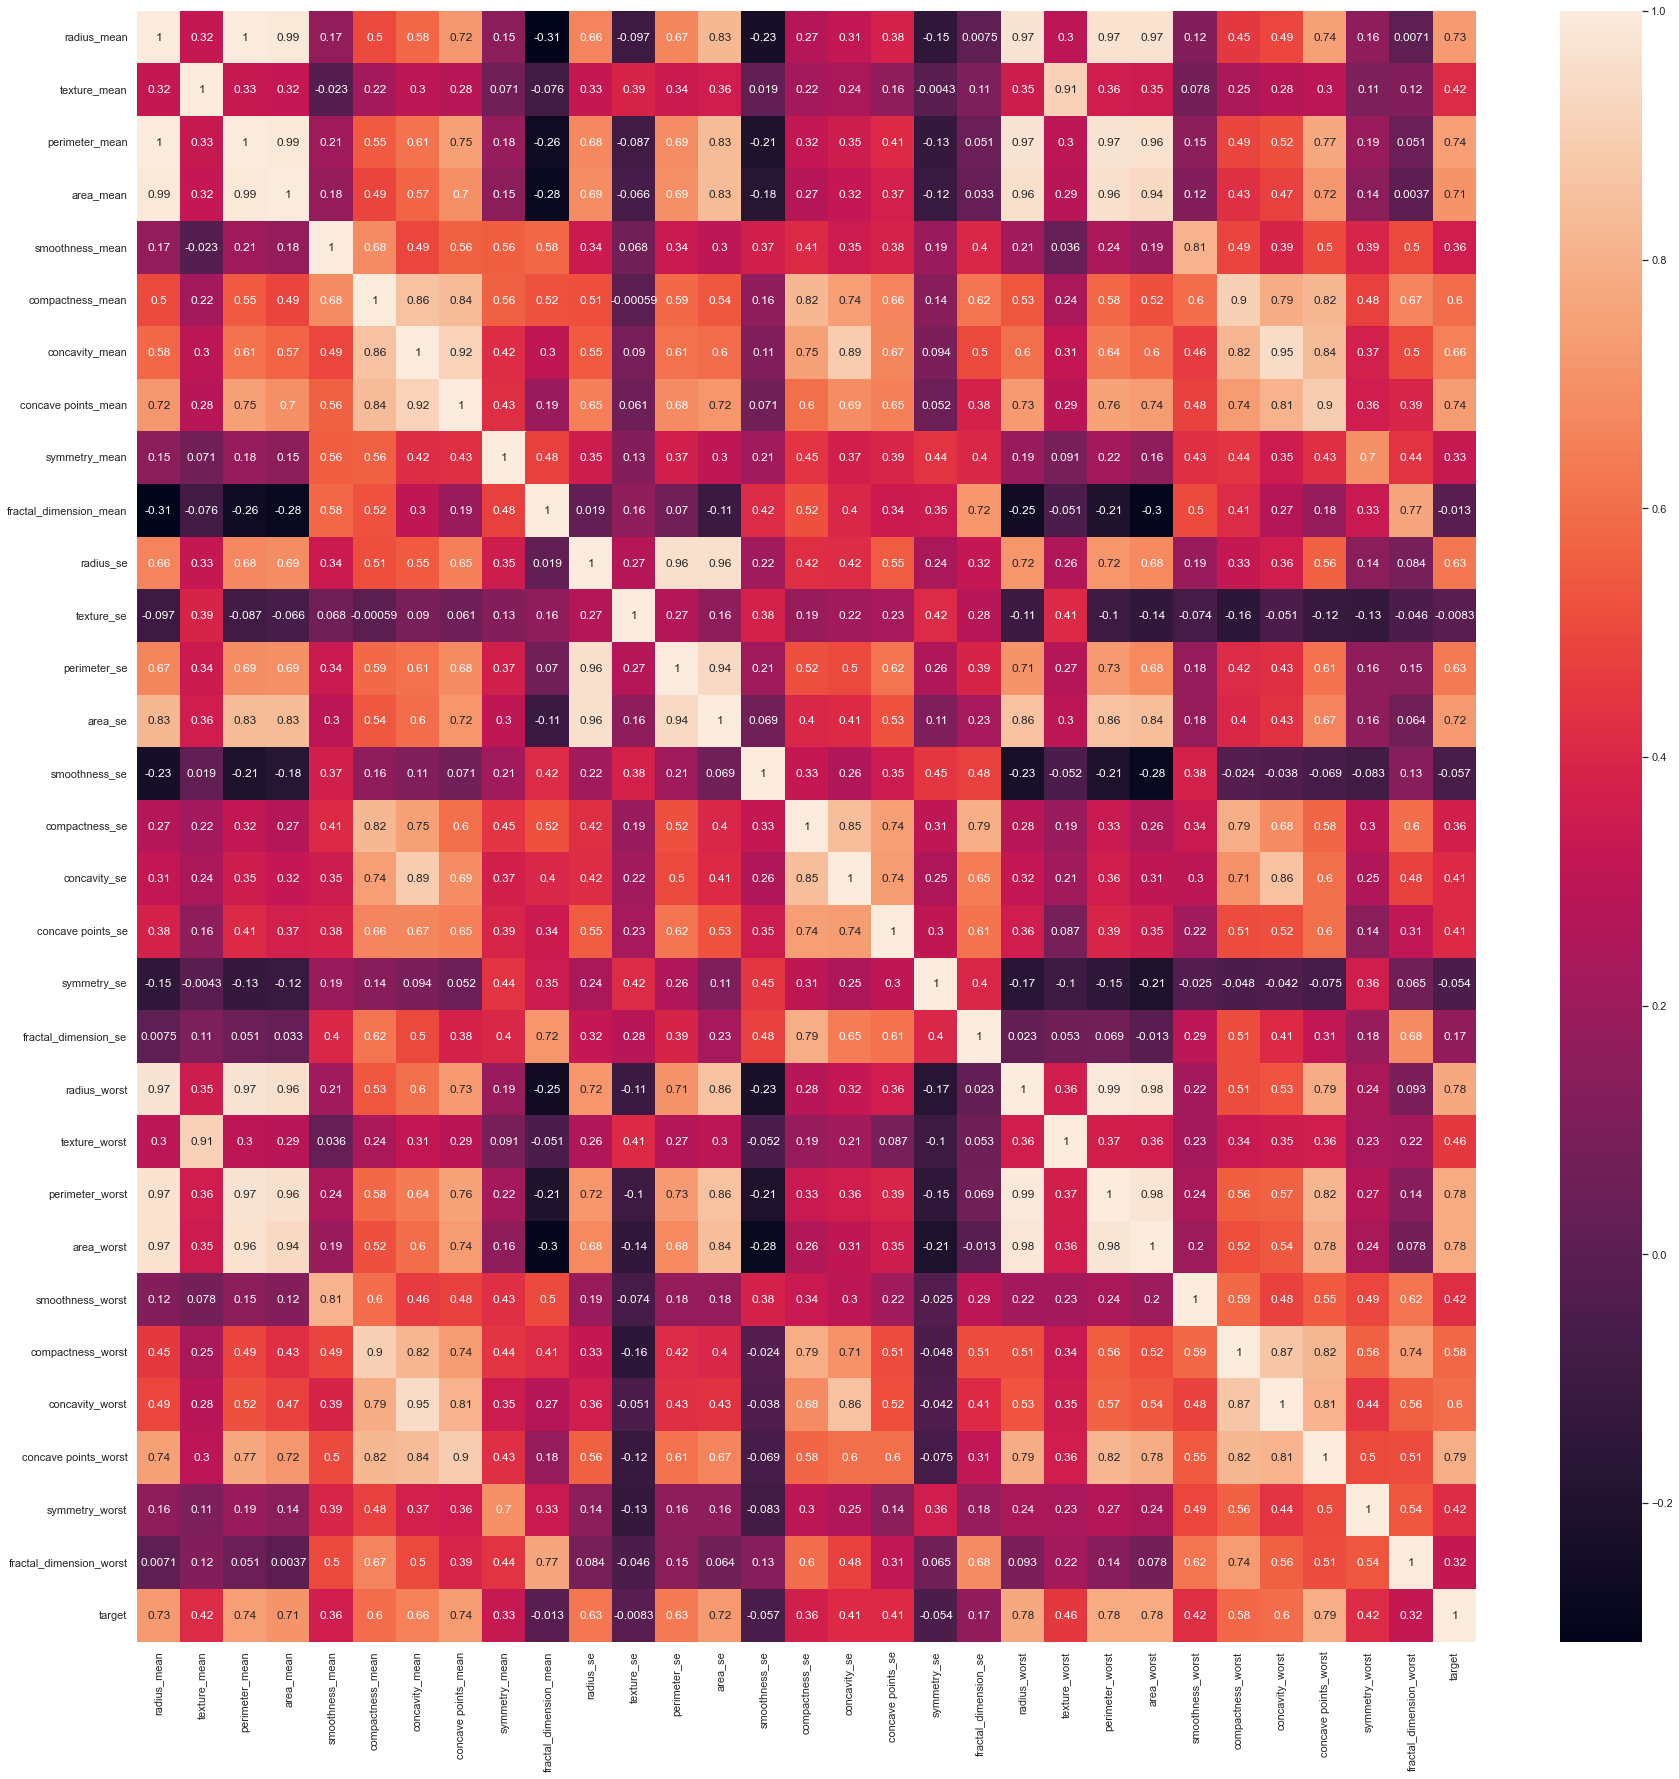

In [61]:
plt.figure(figsize=(30,30))
sns.heatmap(data=df_cancer.corr(), annot=True)
plt.show()

### Data Preprocessing

In [62]:
df_pre = df_cancer.copy()

In [63]:
df_pre.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,-1.281574,-1.203640,-1.916643,0.2419,0.07871,...,17.33,184.60,7.610358,0.1622,-0.407066,-0.339818,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,-2.542875,-2.442997,-2.656834,0.1812,0.05667,...,23.41,158.80,7.578657,0.1238,-1.678788,-1.420472,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,-1.833207,-1.622523,-2.056507,0.2069,0.05999,...,25.53,152.50,7.443664,0.1444,-0.856843,-0.797619,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,-1.259133,-1.421300,-2.251892,0.2597,0.09744,...,26.50,98.87,6.341593,0.2098,-0.143524,-0.375567,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,-2.018911,-1.619488,-2.260484,0.1809,0.05883,...,16.67,152.20,7.362011,0.1374,-1.584745,-0.916291,0.1625,0.2364,0.07678,1


#### Removing Outliers
Menggunakan metode IQR

In [67]:
q1 = df_pre.quantile(0.25)
q3 = df_pre.quantile(0.75)
IQR = q3-q1
print(IQR)

radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.697451
concavity_mean               1.486483
concave points_mean          1.292952
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.723032
texture_se                   0.640100
perimeter_se                 0.737301
area_se                      0.928872
smoothness_se                0.454848
compactness_se               0.908616
concavity_se                 1.024827
concave points_se            0.007072
symmetry_se                  0.437489
fractal_dimension_se         0.706843
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                   0.743664
smoothness_worst             0.029400
compactness_worst            0.834503
concavity_wo

In [68]:
iqr_df_pre = df_pre[~((df_pre<(q1-1.5*IQR))| (df_pre>(q3+1.5*IQR))).any(axis=1)]
iqr_df_pre.shape

(434, 31)

<ipython-input-69-84abb813db92>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


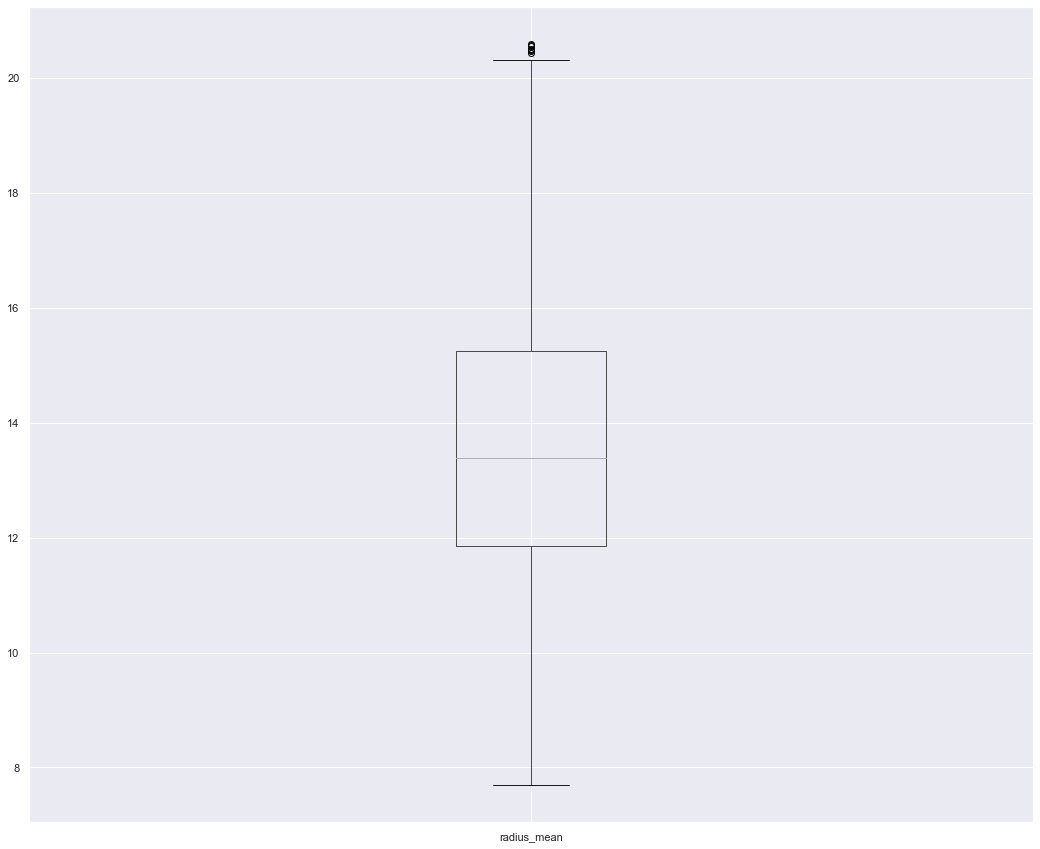

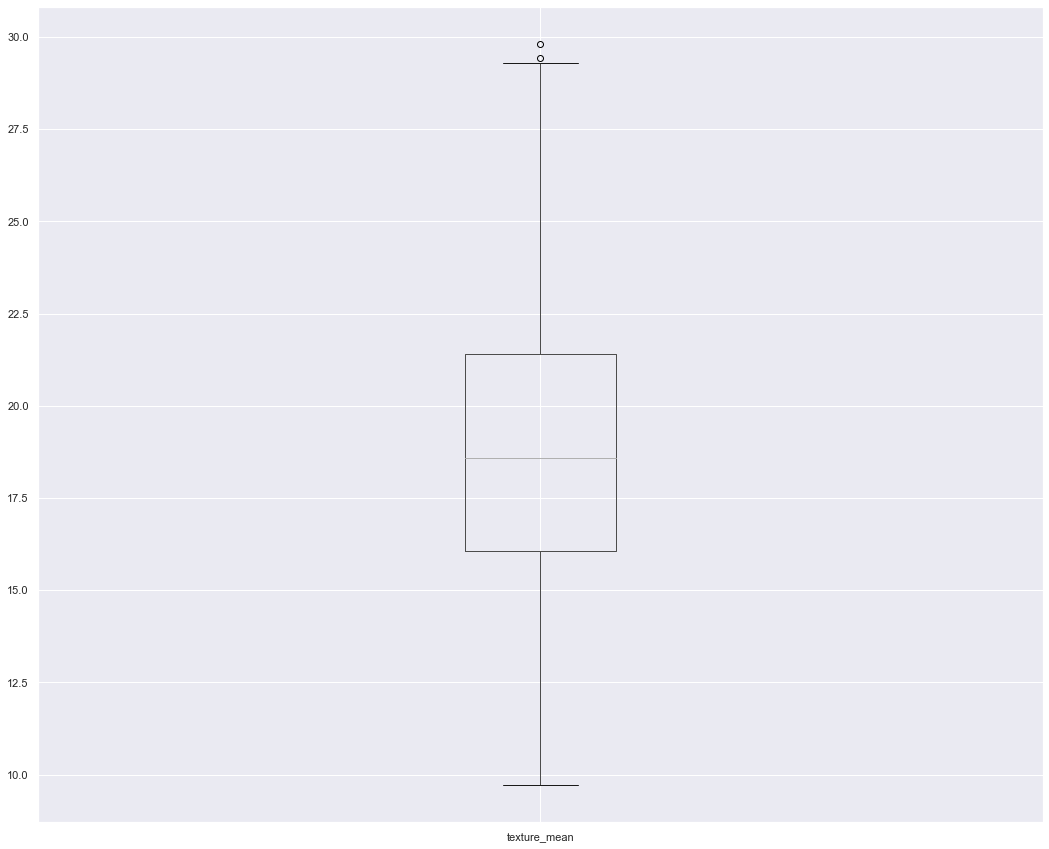

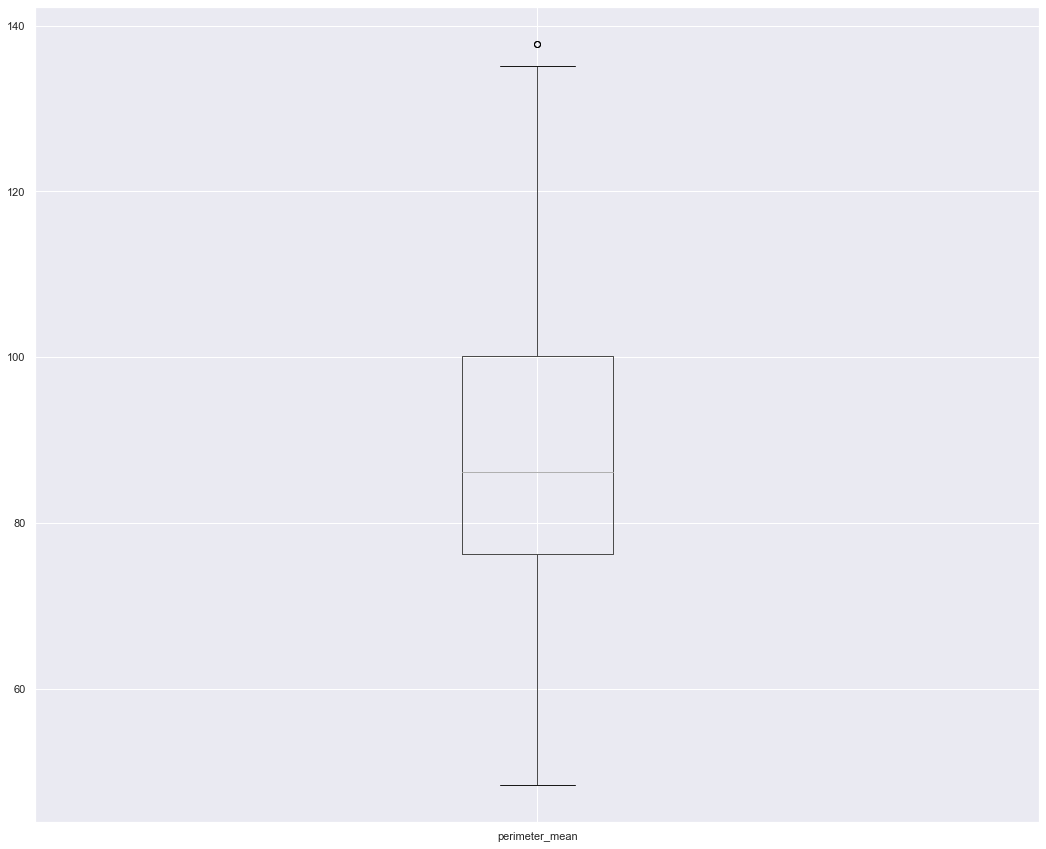

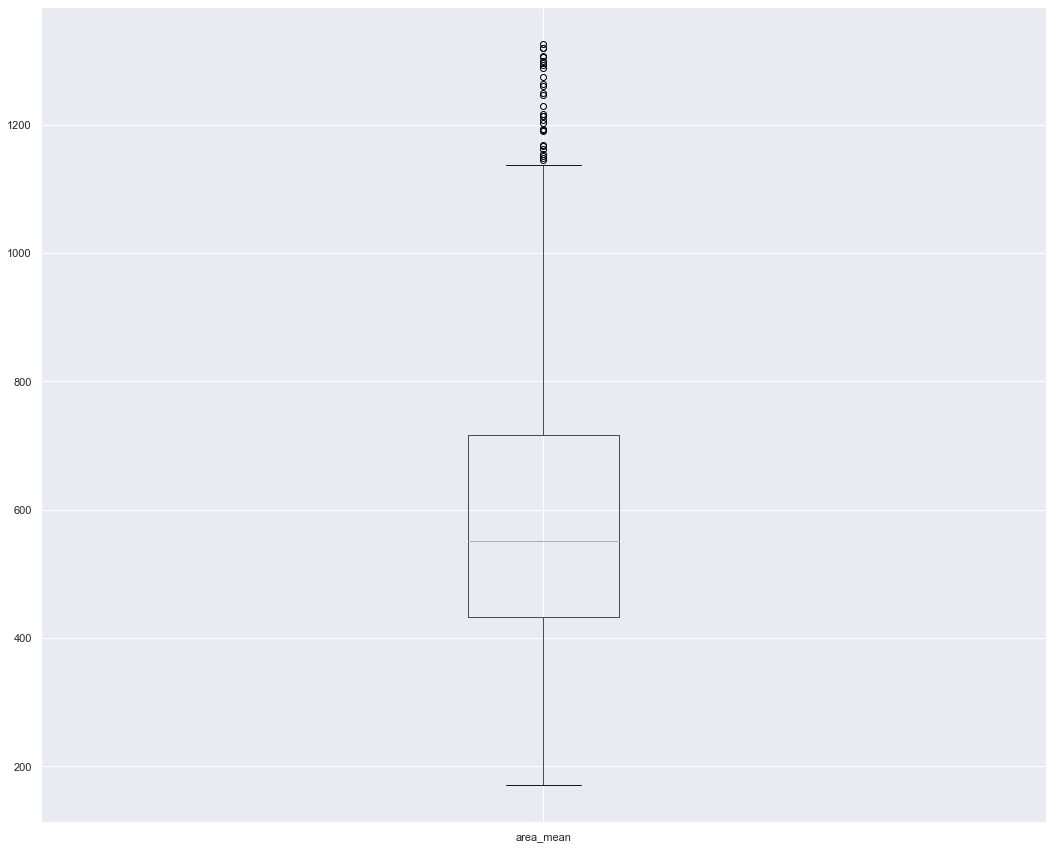

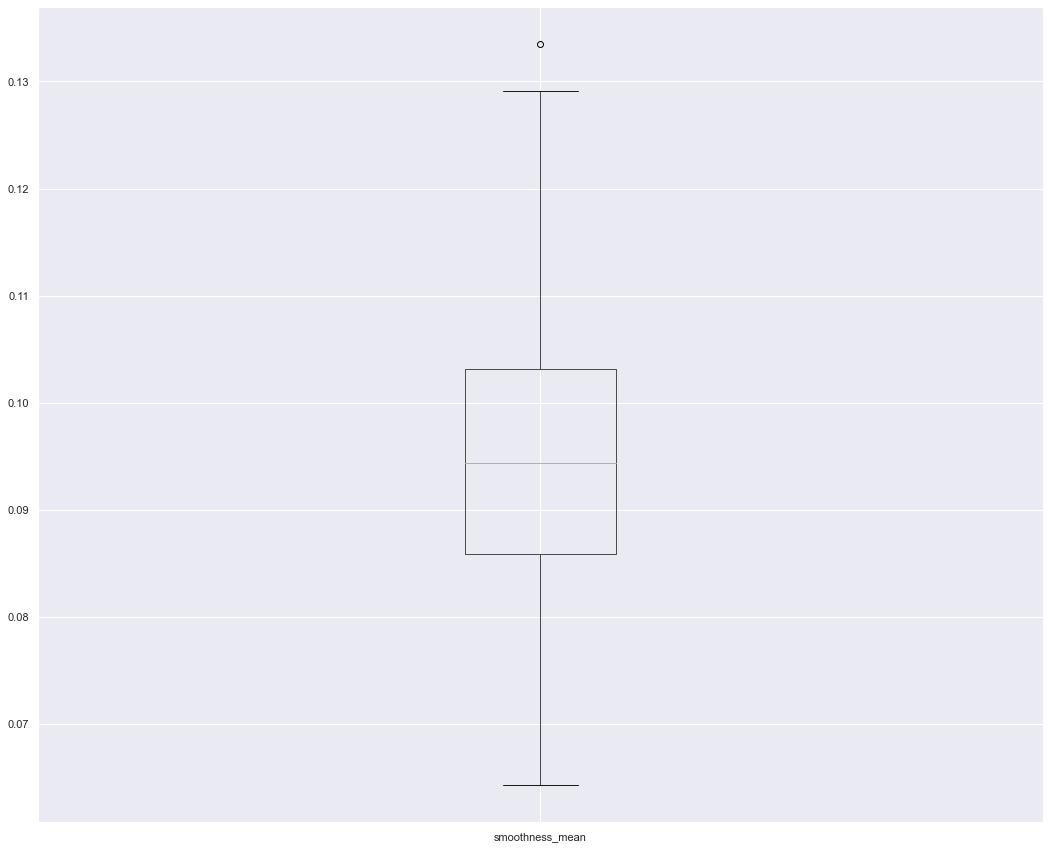

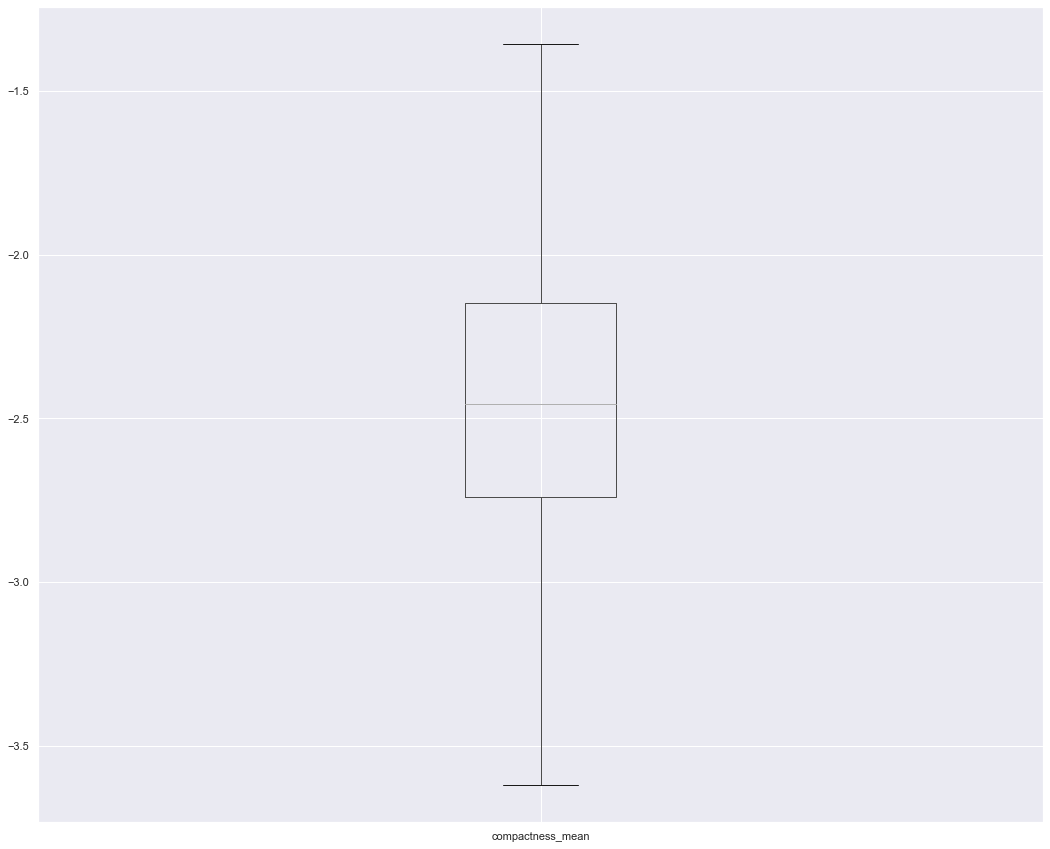

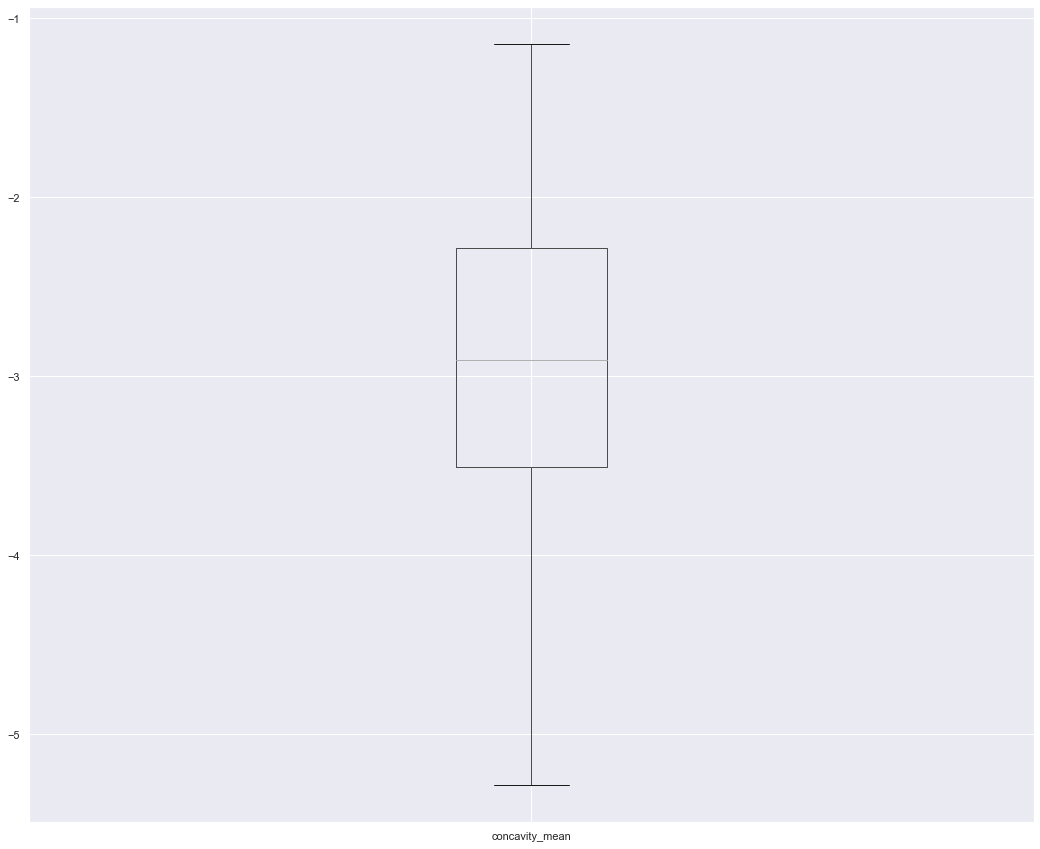

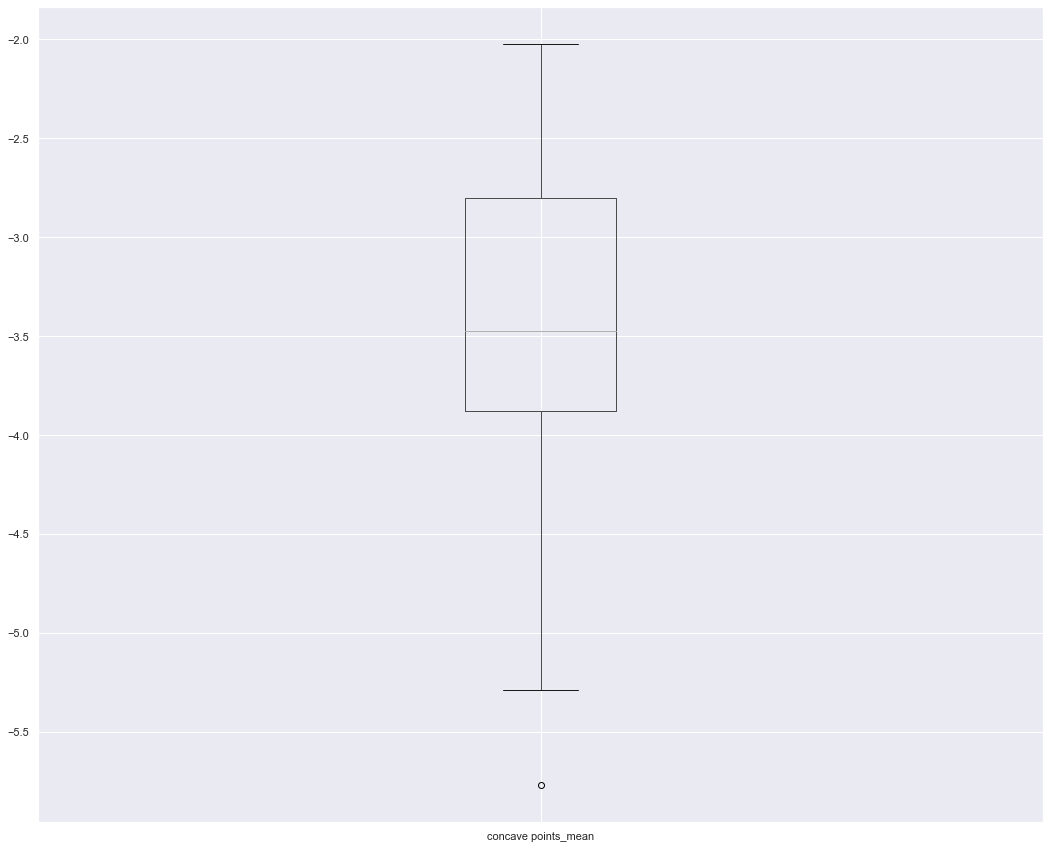

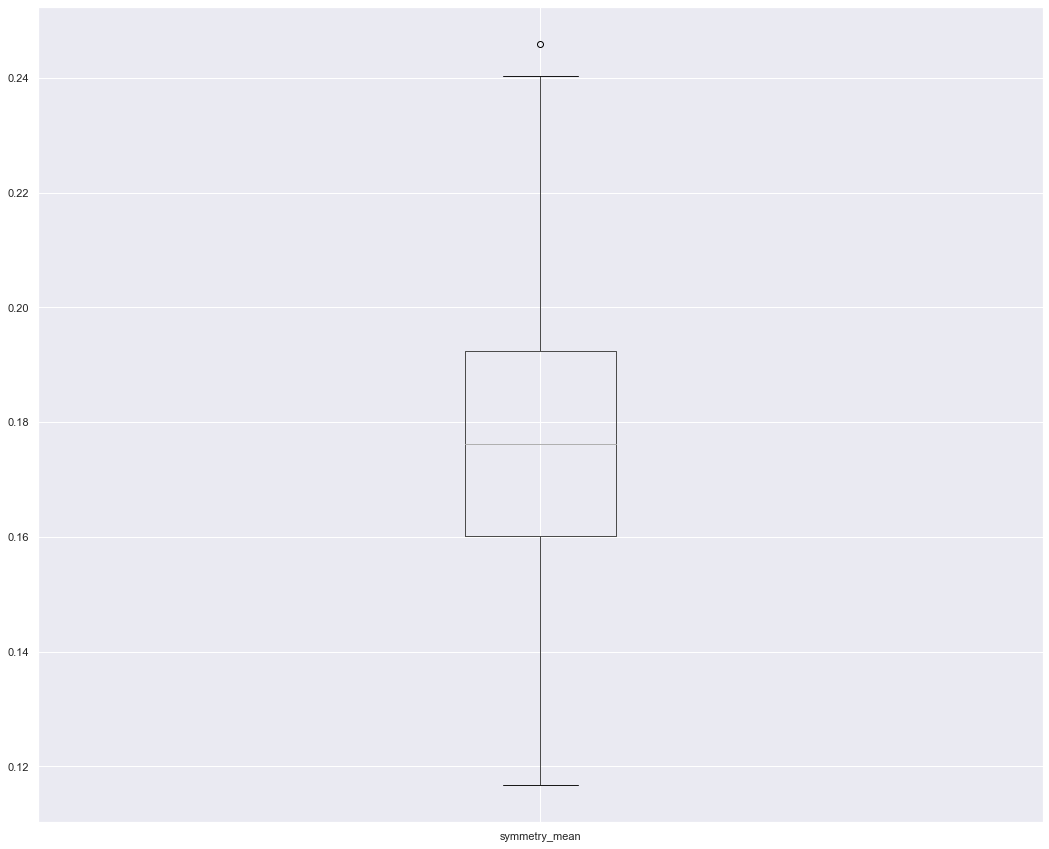

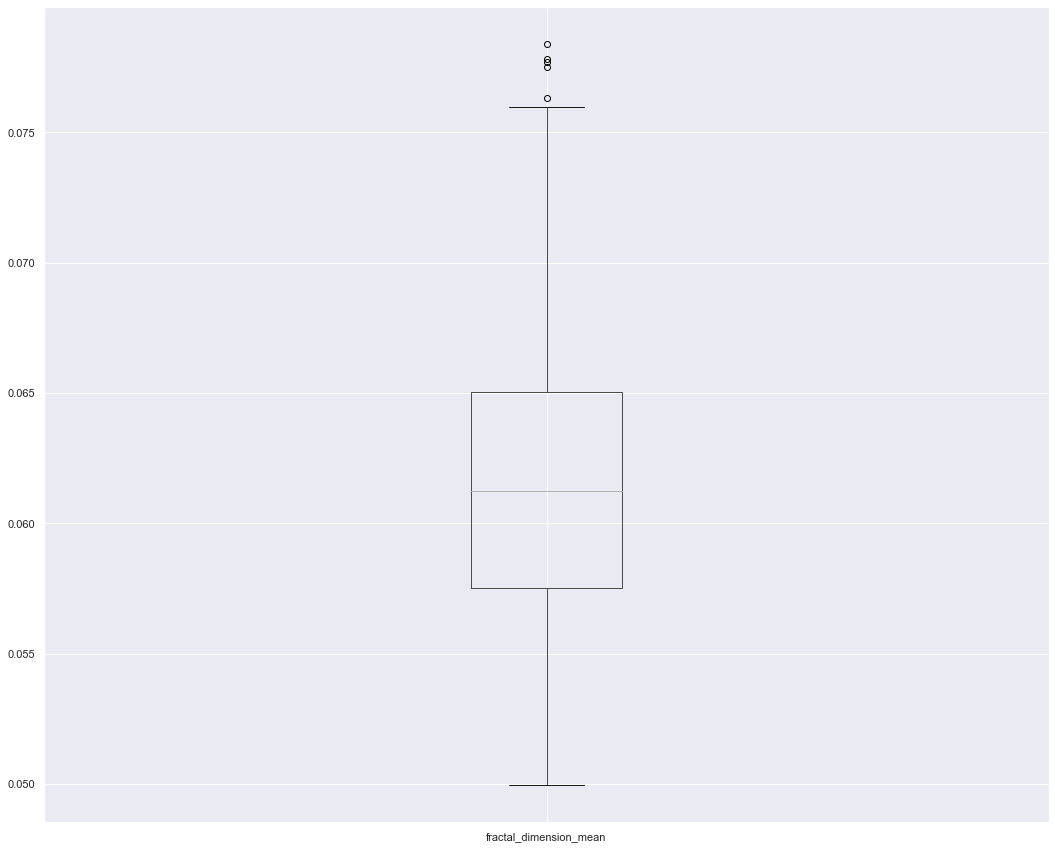

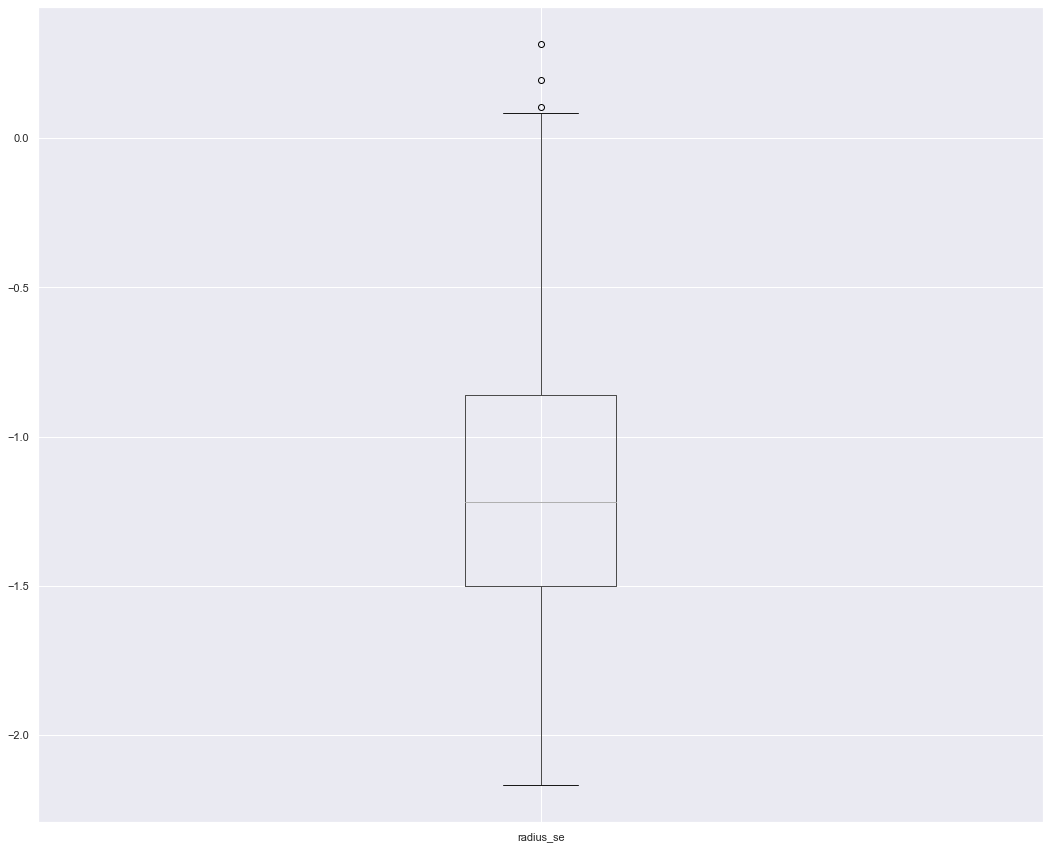

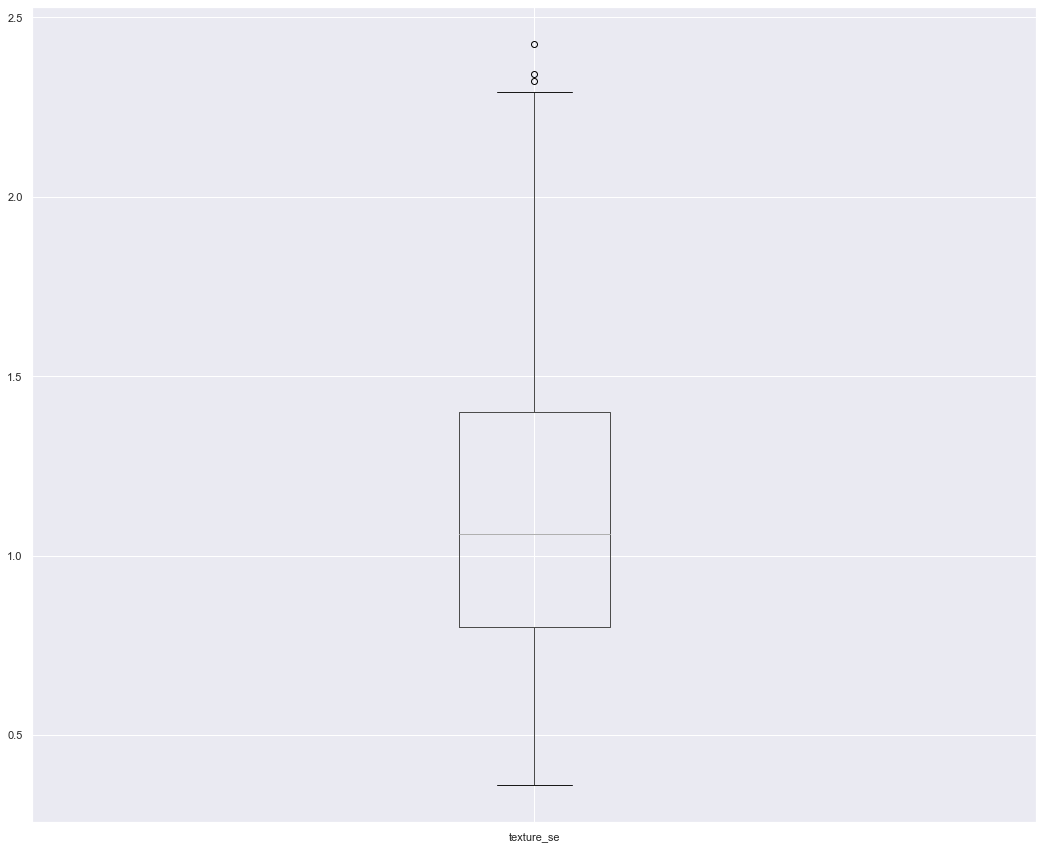

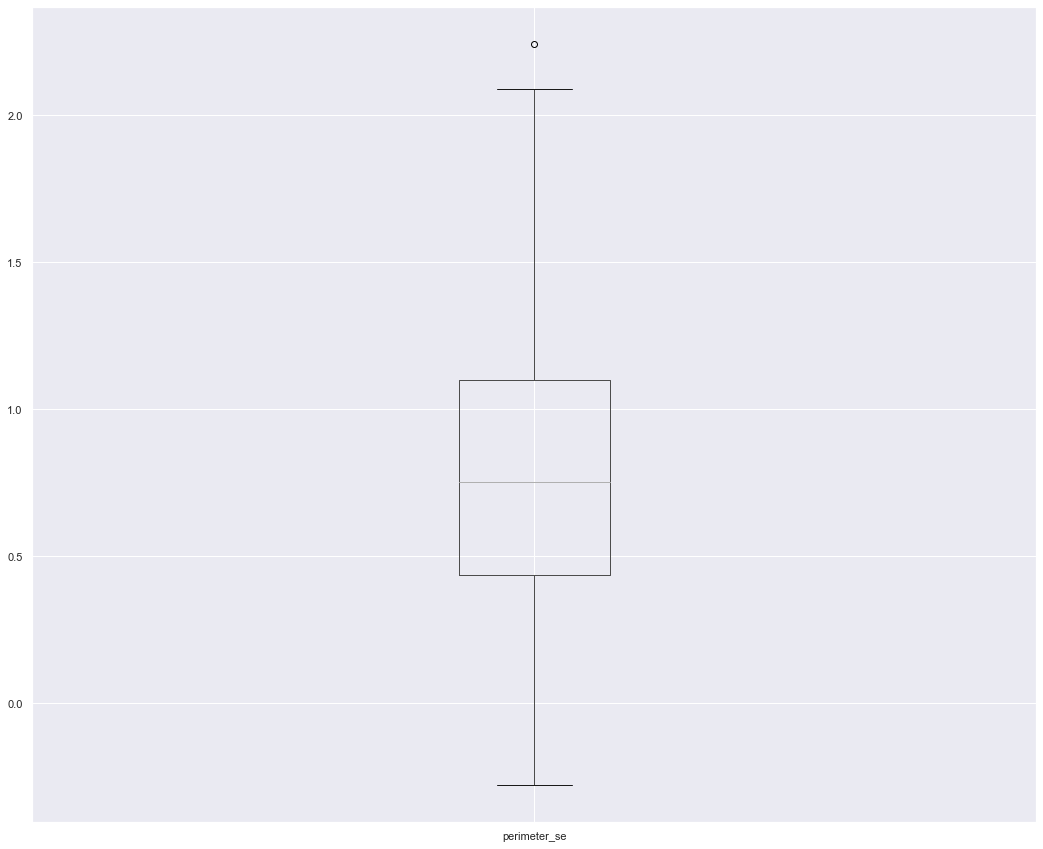

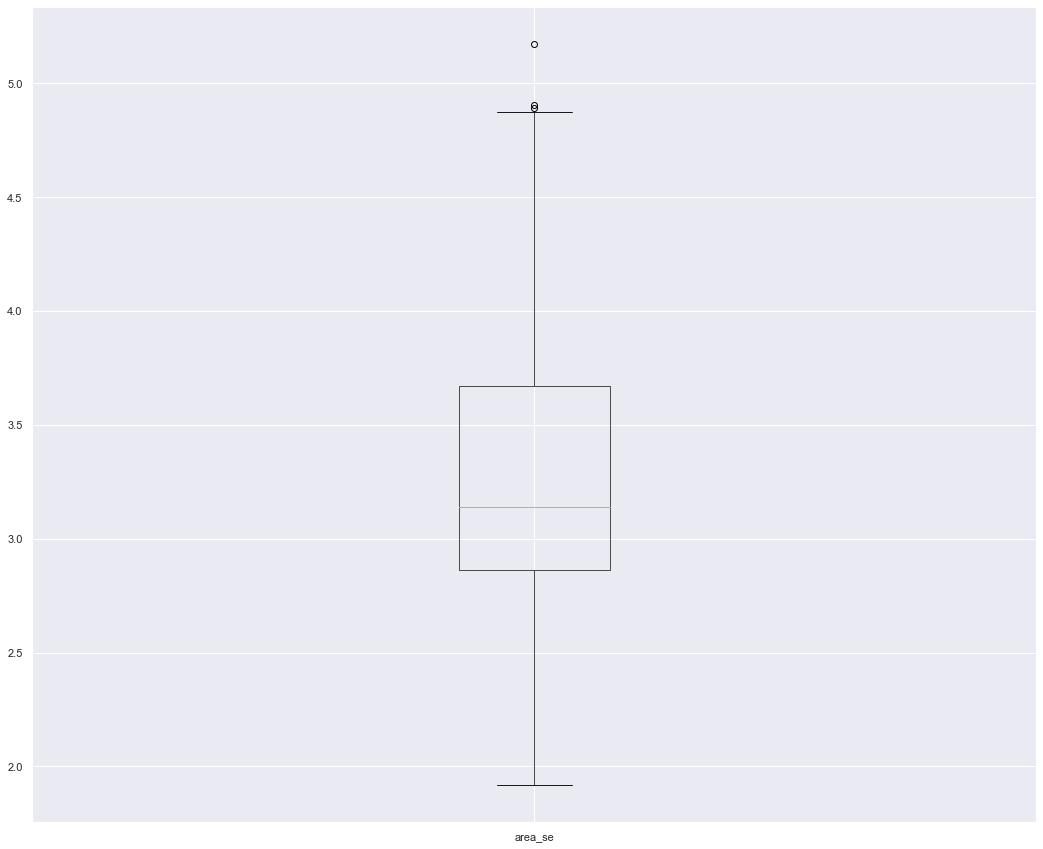

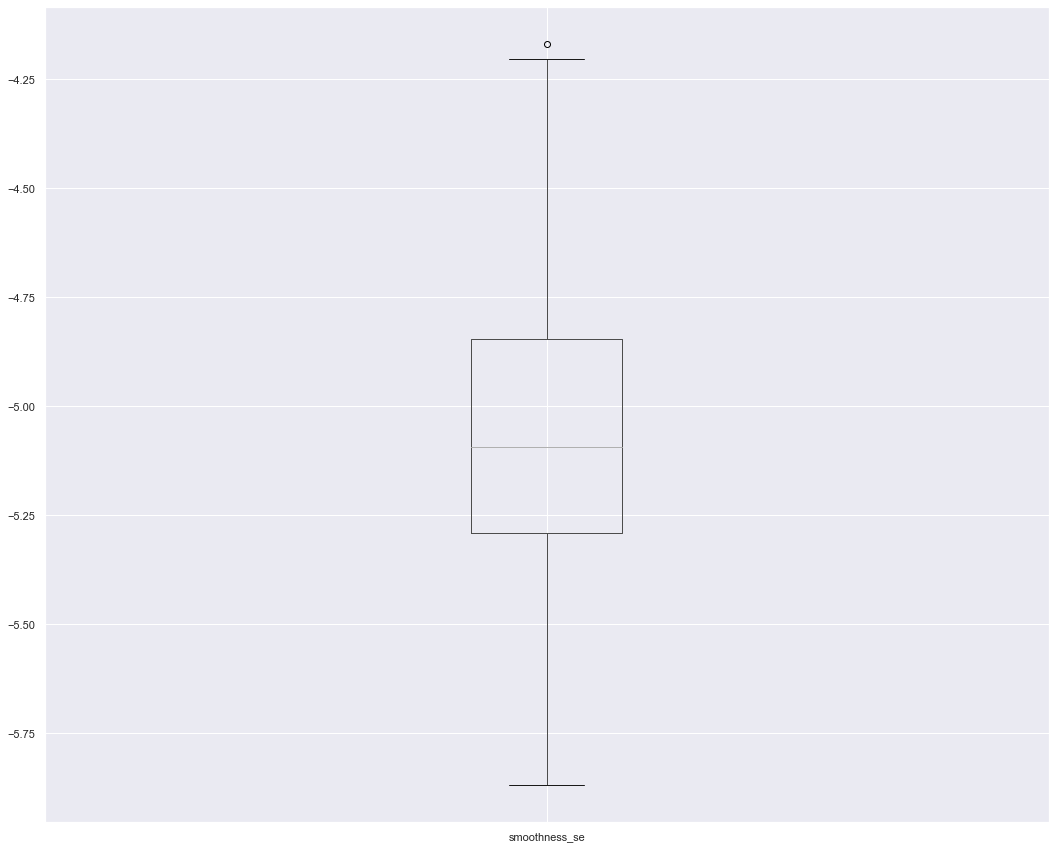

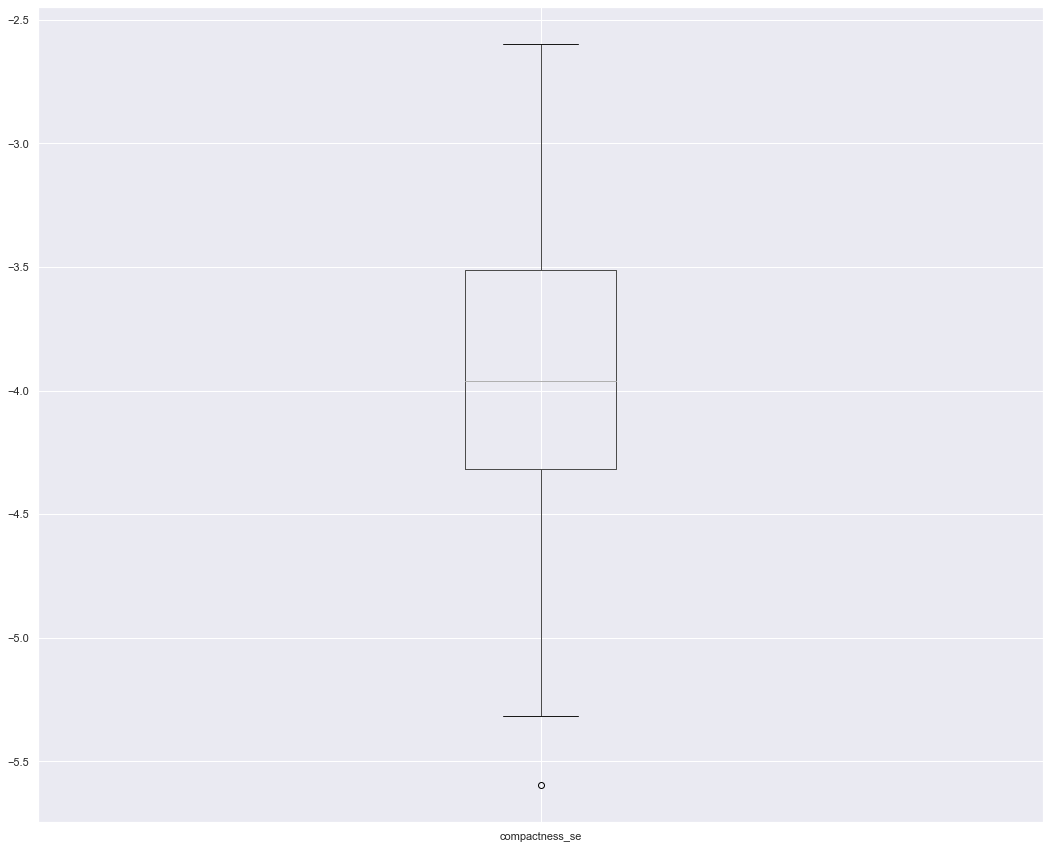

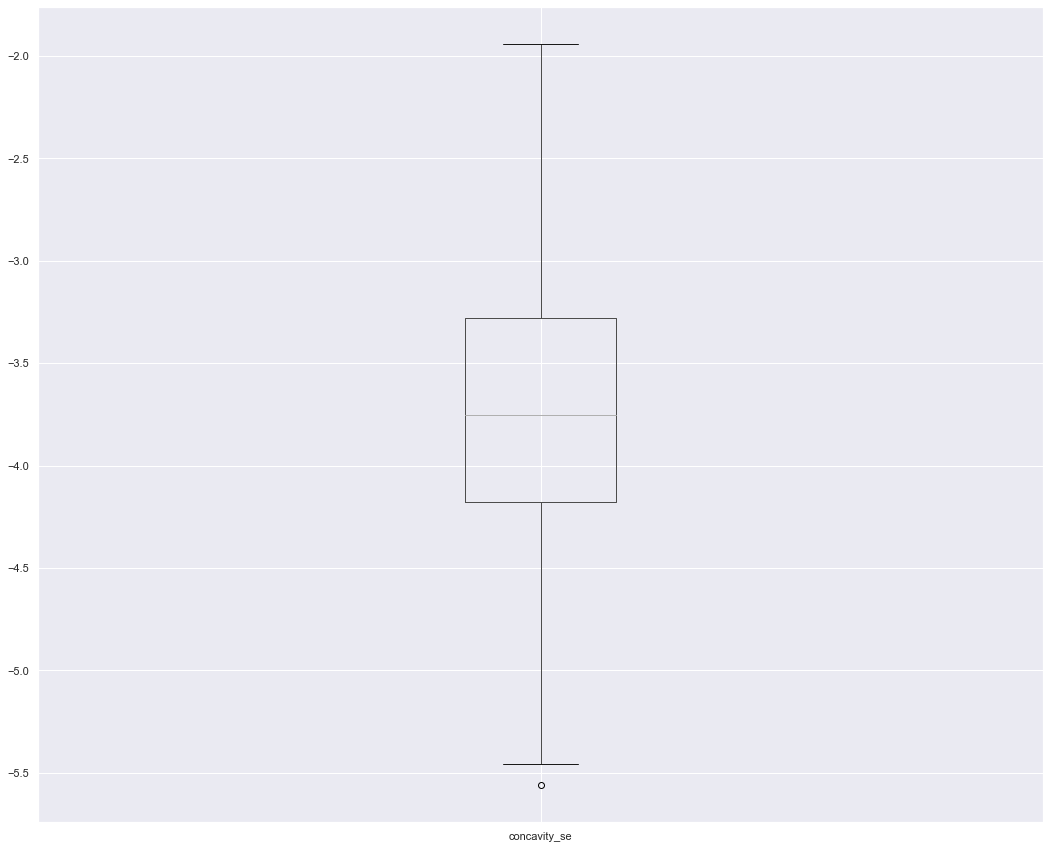

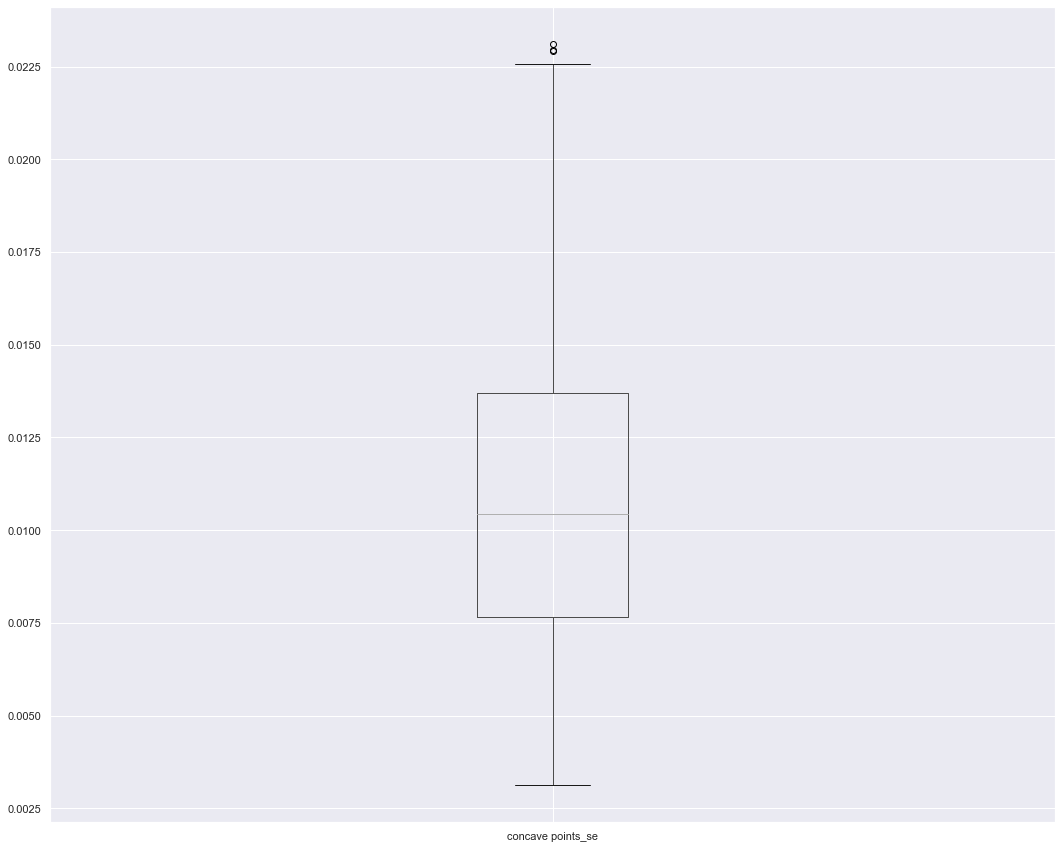

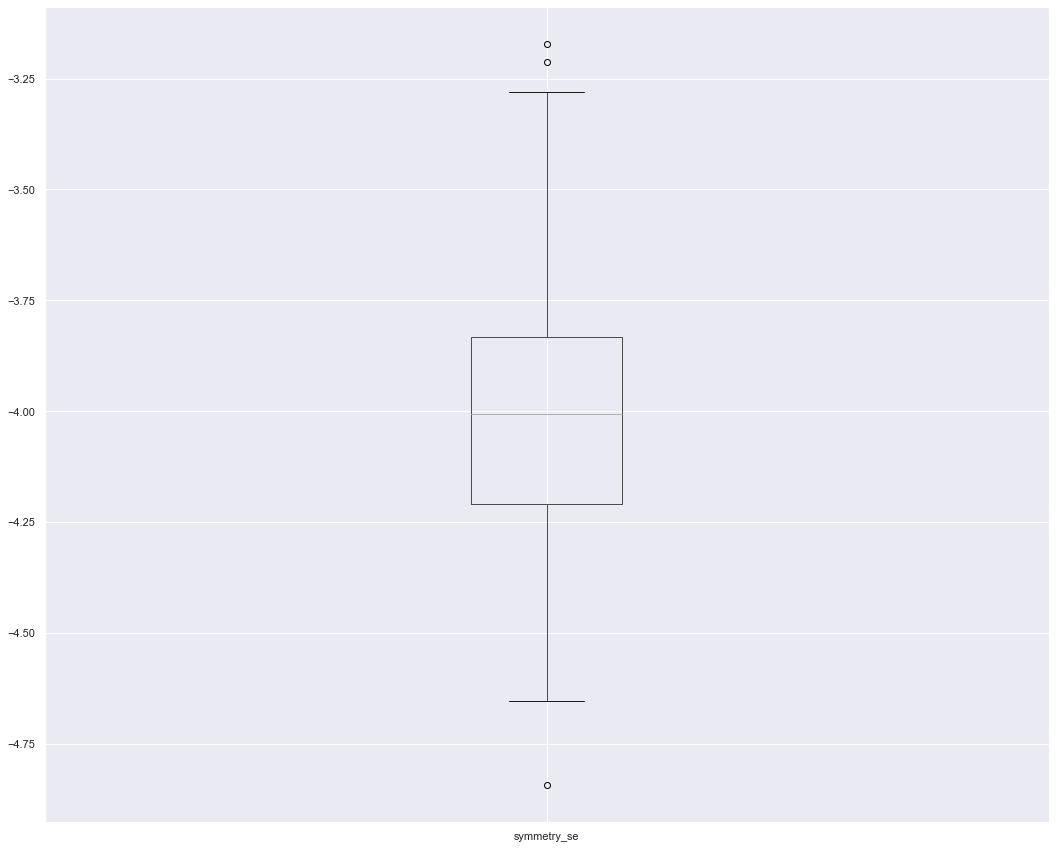

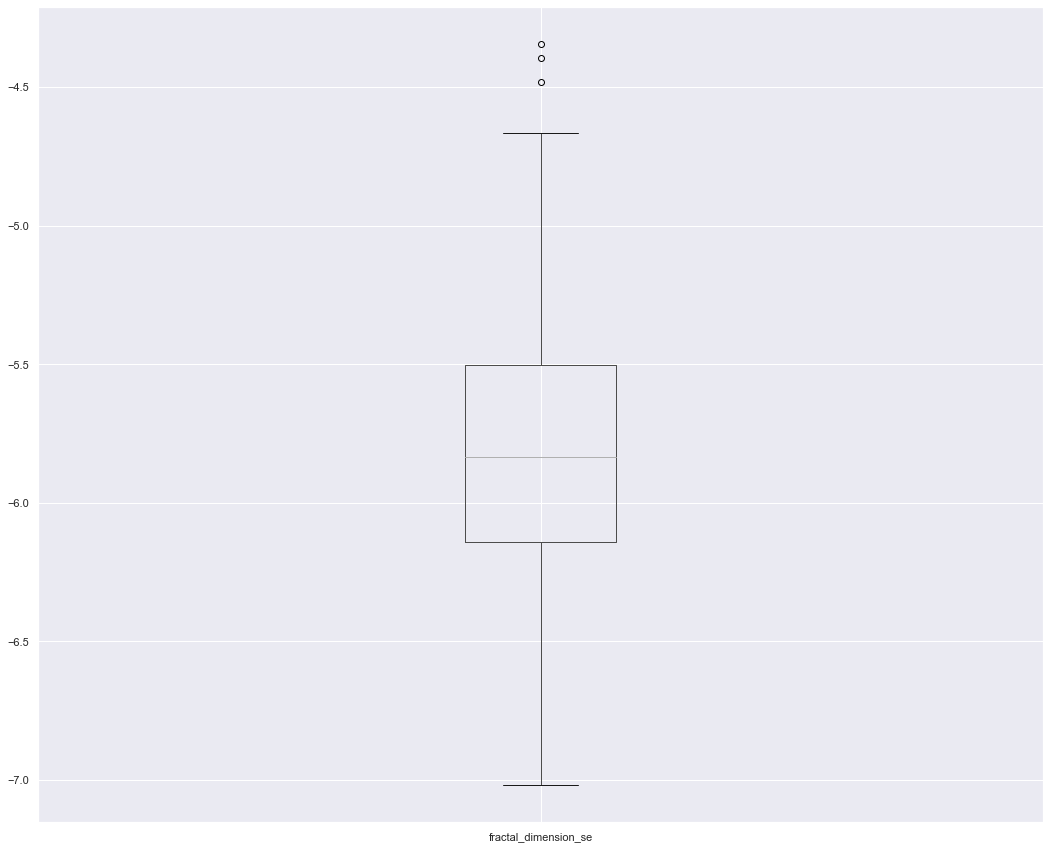

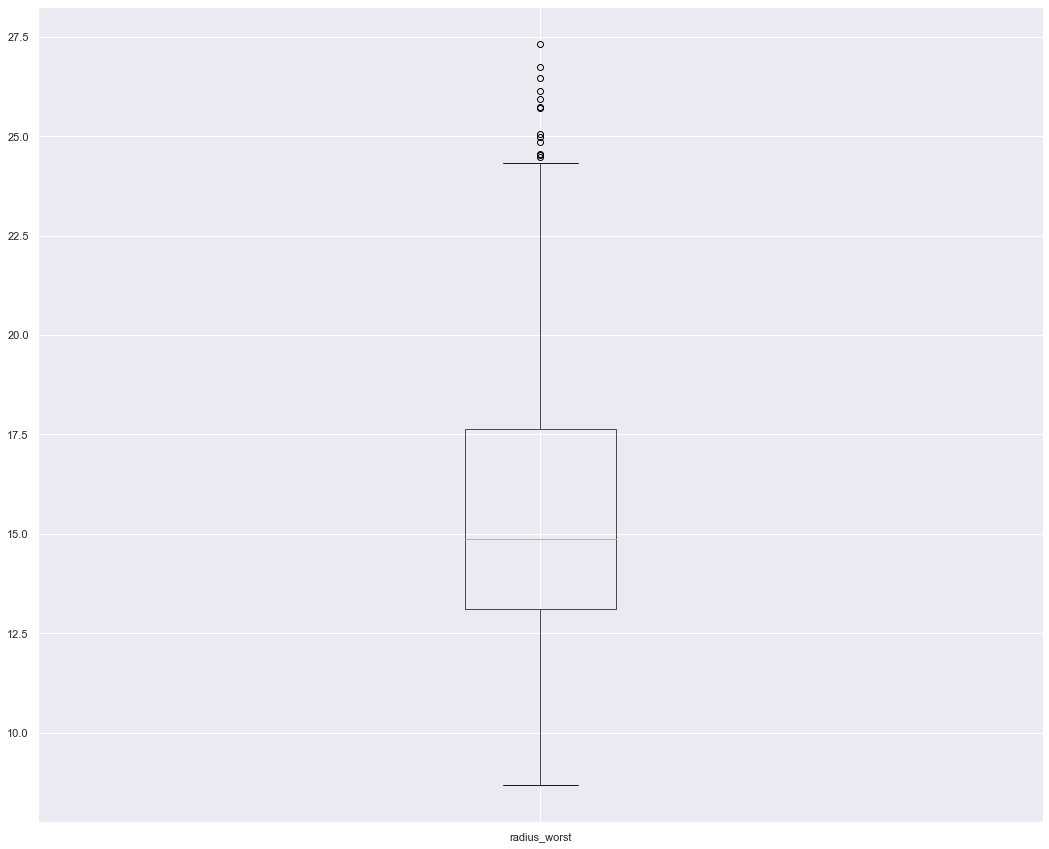

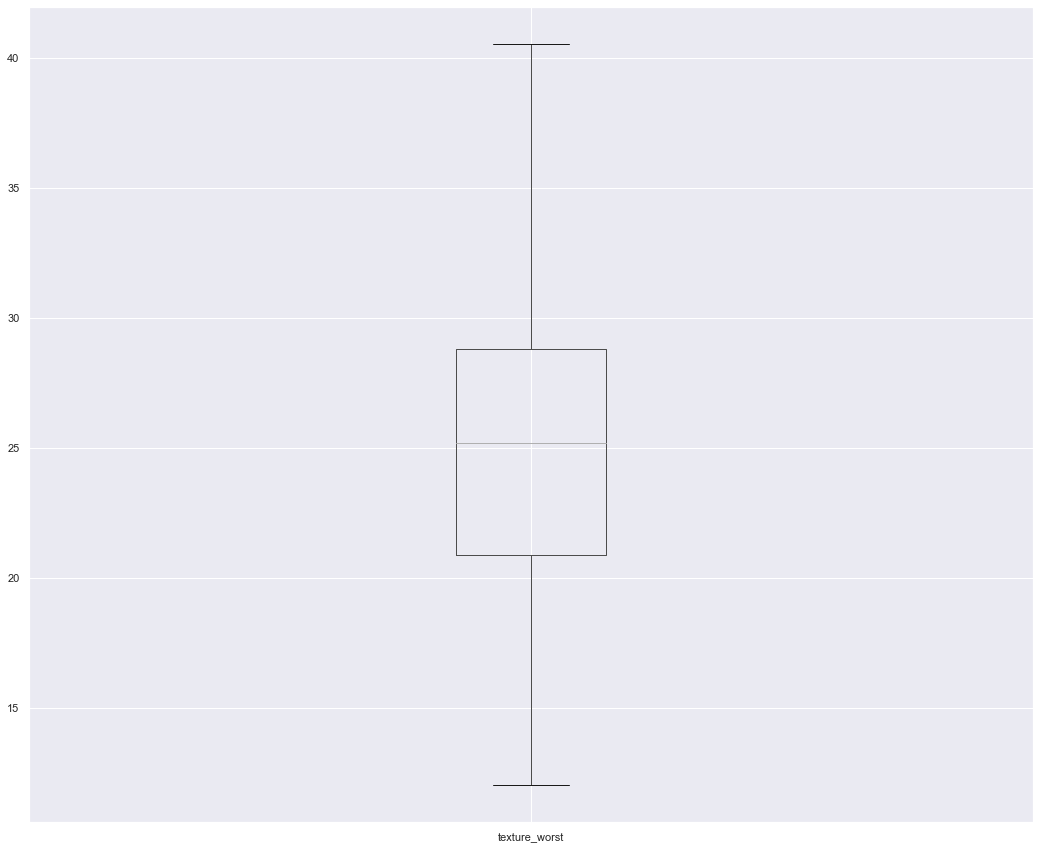

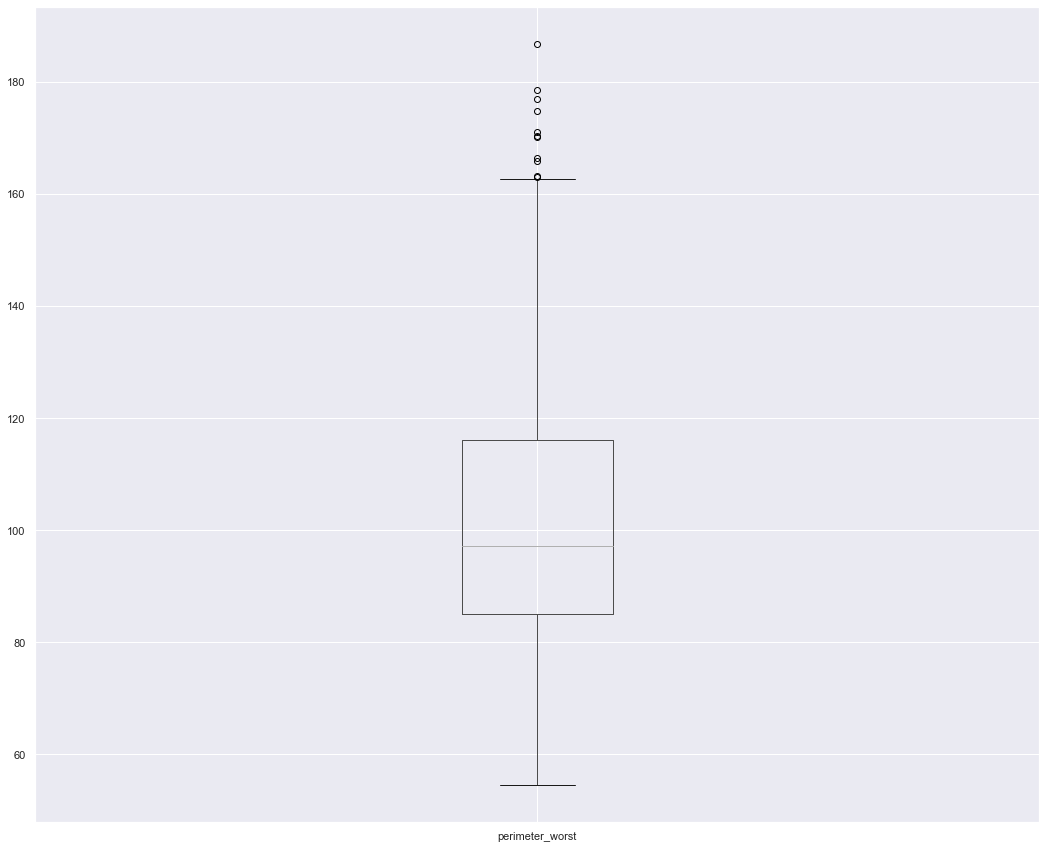

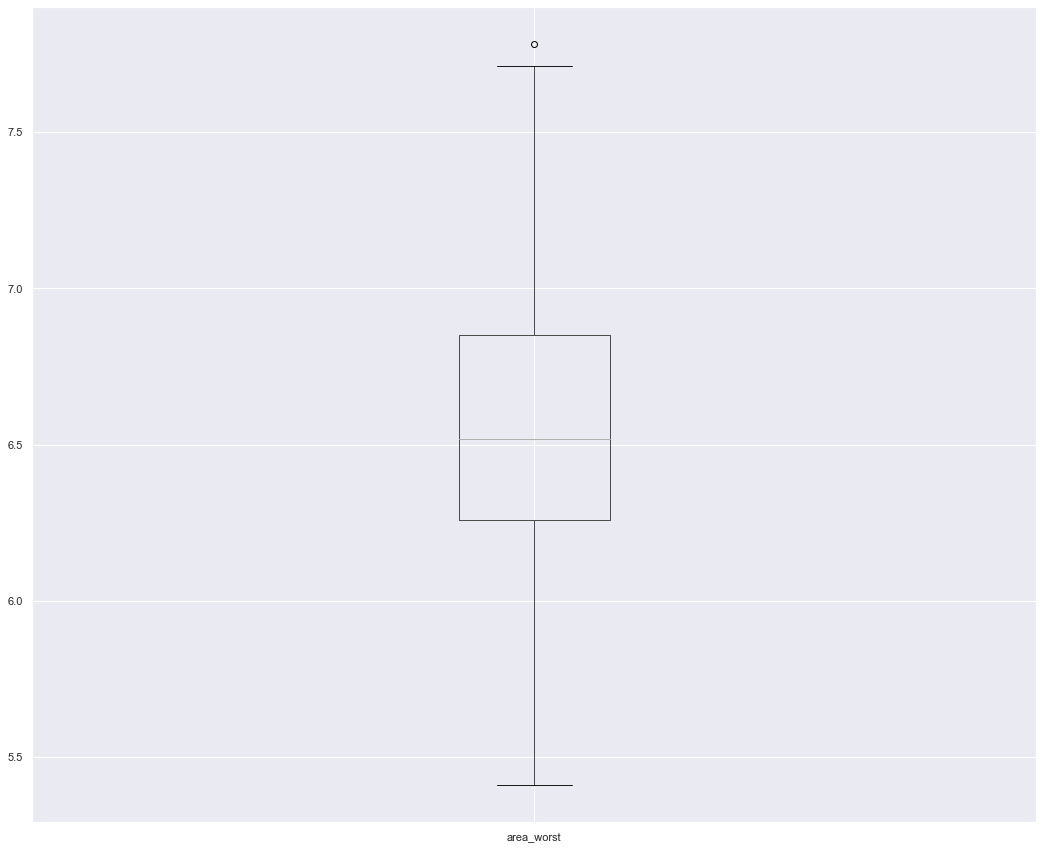

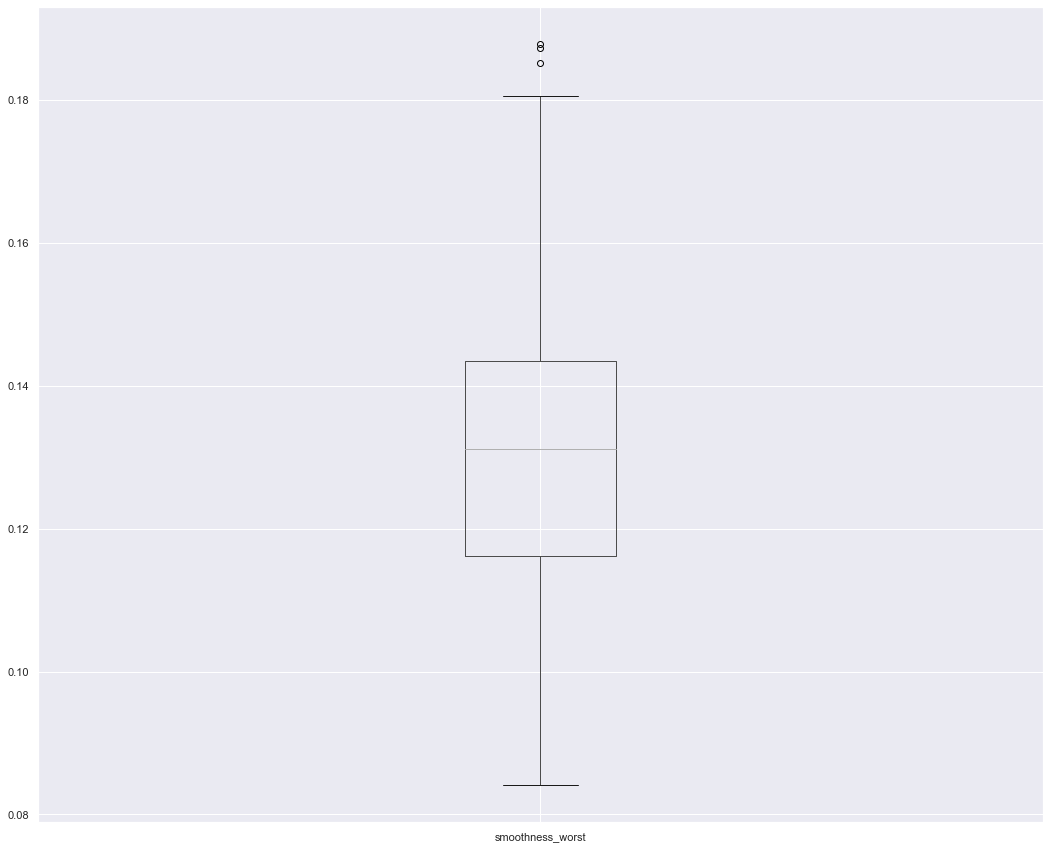

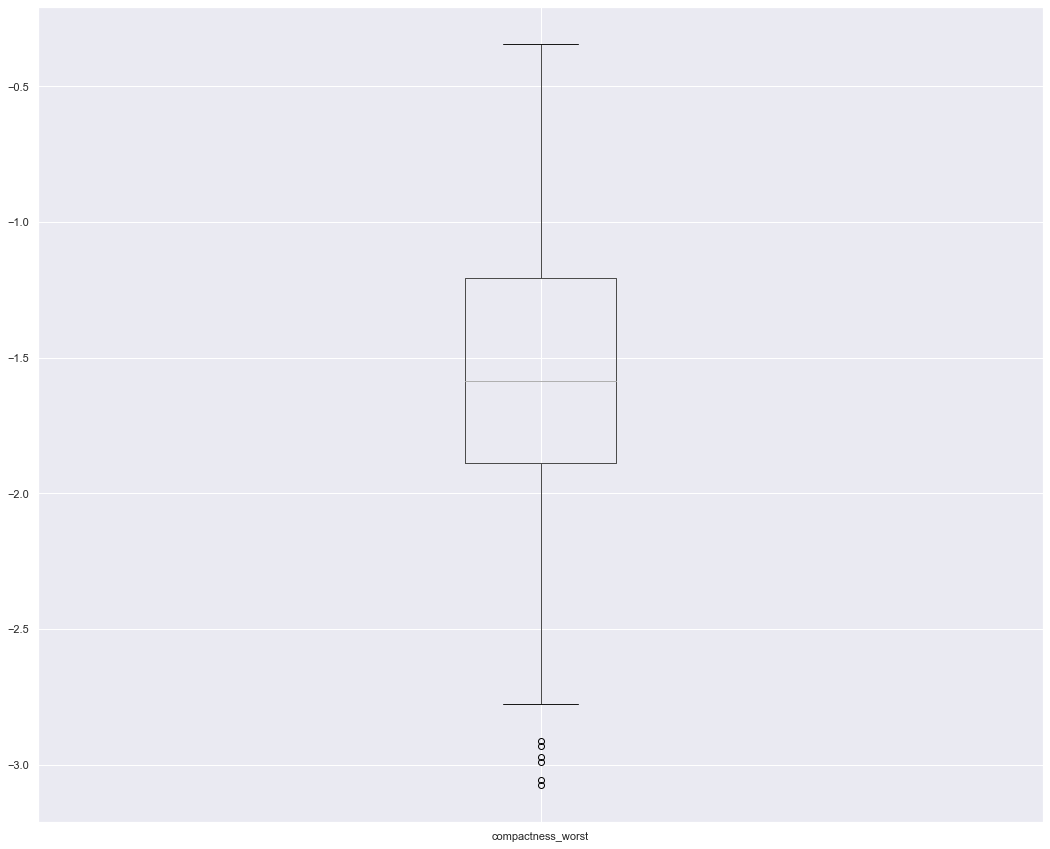

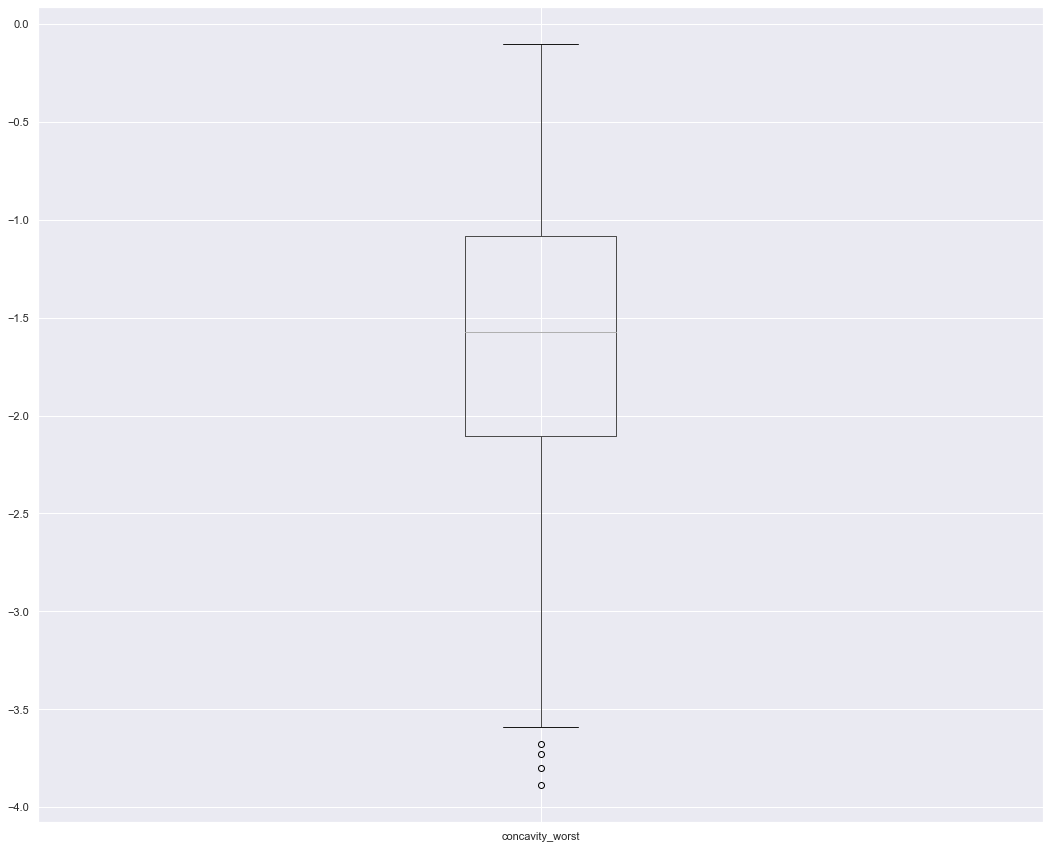

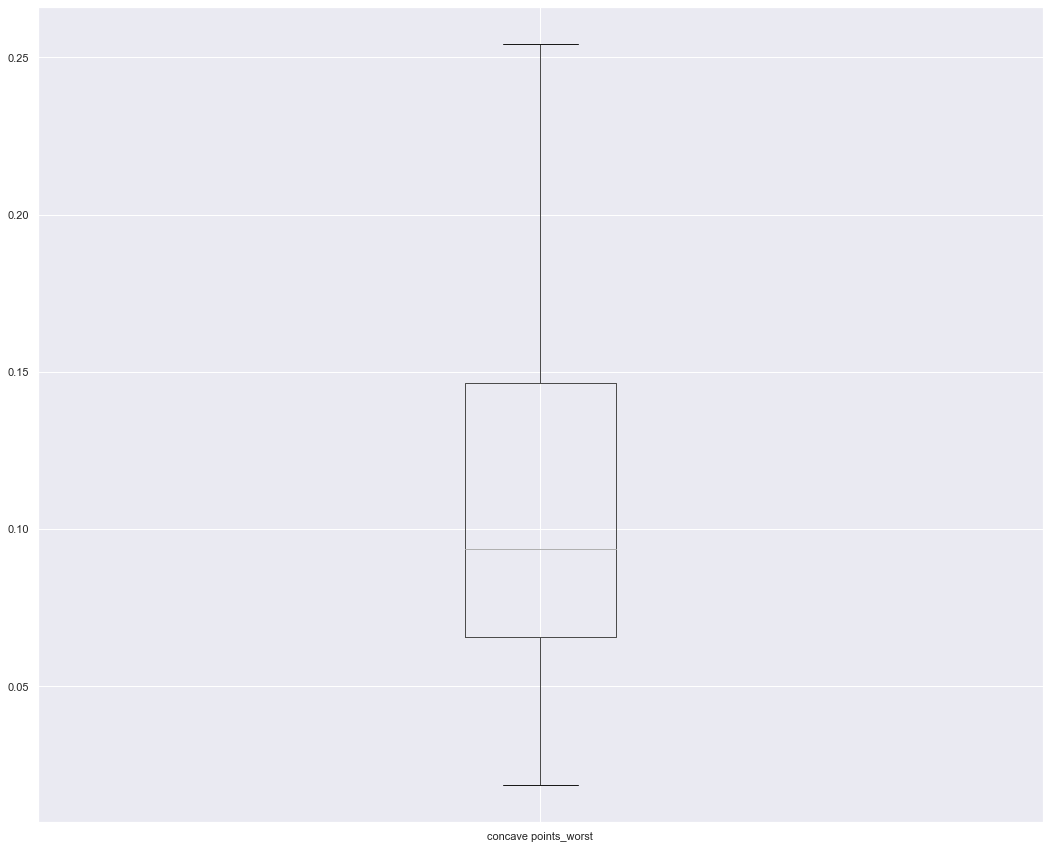

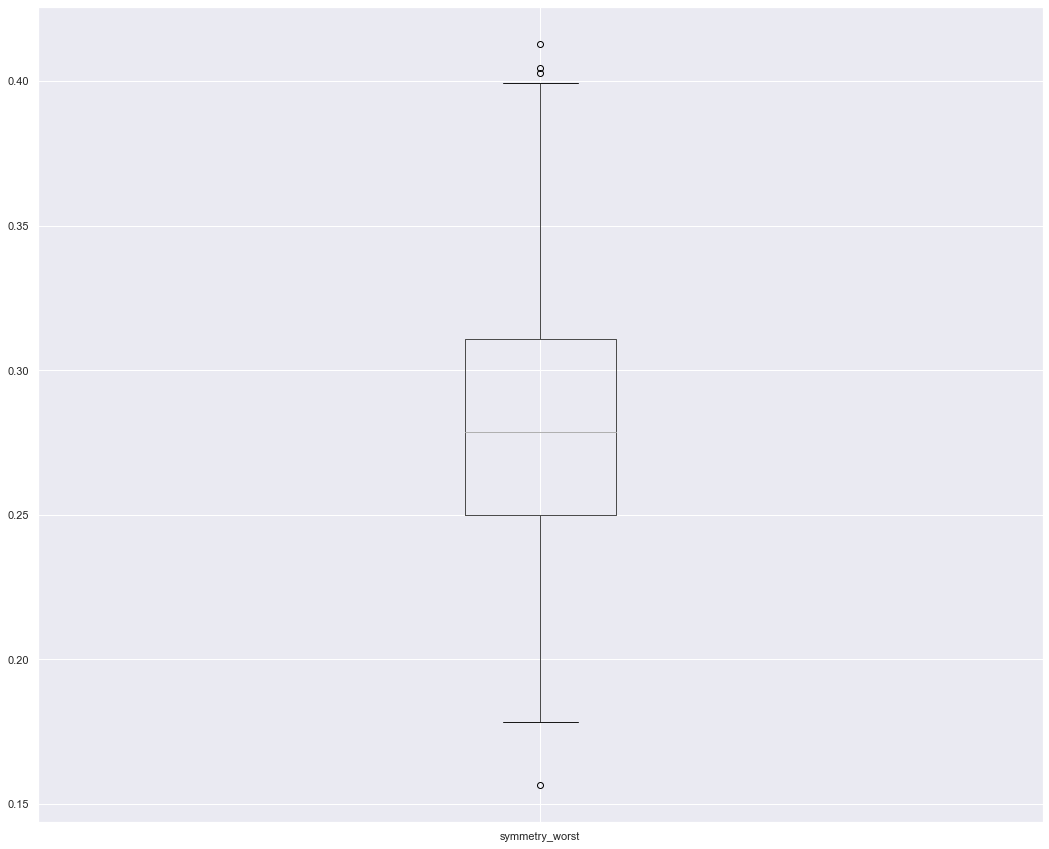

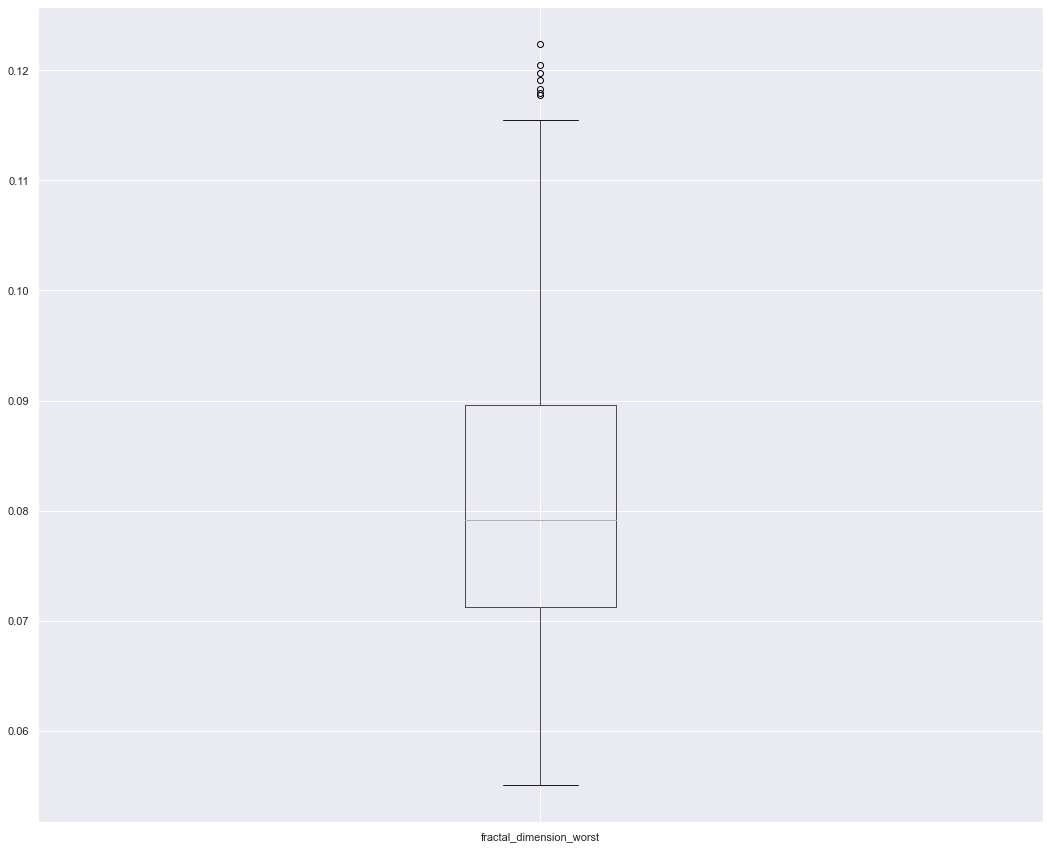

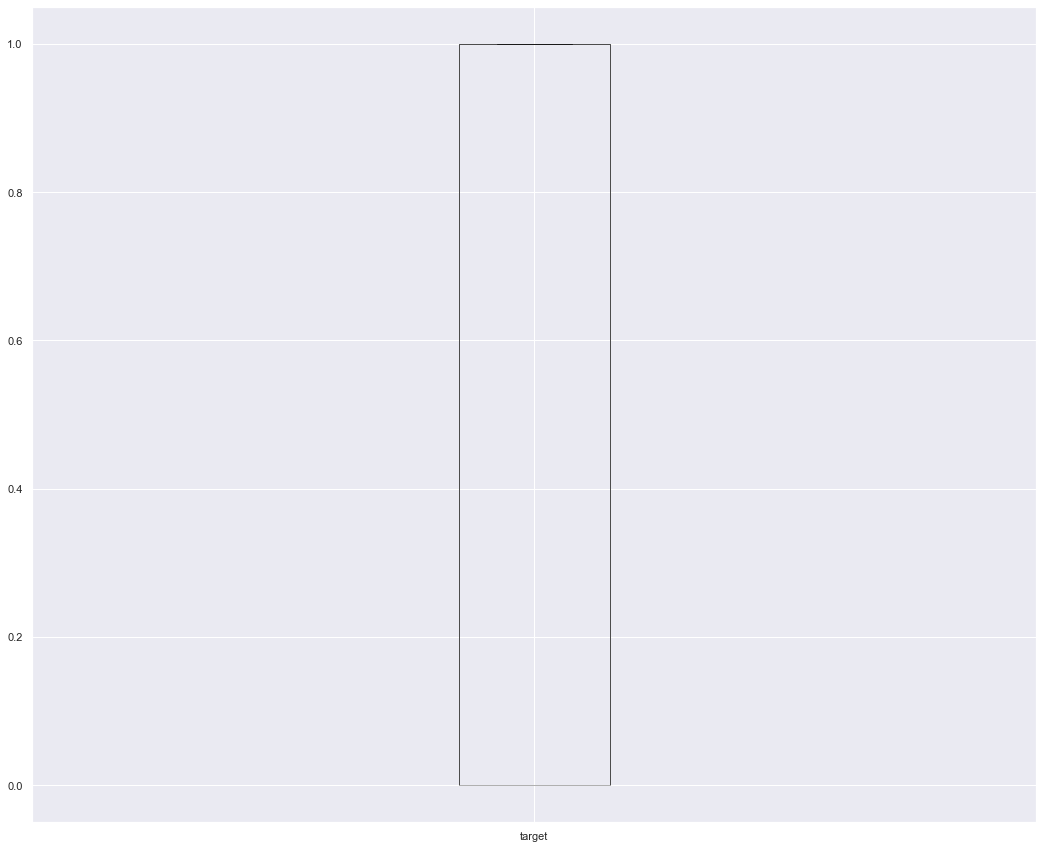

In [69]:
for column in iqr_df_pre:
    plt.figure()
    iqr_df_pre.boxplot([column])

In [70]:
iqr_df_pre.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
target                     0
dtype: int64

#### Oversampling Technique

In [73]:
x = iqr_df_pre.loc[:, iqr_df_pre.columns != 'target']
y = iqr_df_pre['target']

seed = 78
k = 1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)

x_res, y_res = sm.fit_resample(x, y)

In [74]:
new_df_cancer = pd.concat([pd.DataFrame(x_res), pd.DataFrame(y_res)],axis=1)

In [75]:
new_df_cancer['target'].value_counts()

1    295
0    295
Name: target, dtype: int64

#### Scaling & Split Data

In [76]:
mx = MinMaxScaler()

In [77]:
feature_scaled = new_df_cancer.copy()
print(feature_scaled)

     radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  \
0      20.570000     17.770000      132.900000  1326.000000         0.084740   
1      19.690000     21.250000      130.000000  1203.000000         0.109600   
2      20.290000     14.340000      135.100000  1297.000000         0.100300   
3      18.250000     19.980000      119.600000  1040.000000         0.094630   
4      13.710000     20.830000       90.200000   577.900000         0.118900   
..           ...           ...             ...          ...              ...   
585    20.467381     20.766891      134.621440  1298.476263         0.091555   
586    19.193736     20.695158      126.584264  1149.831472         0.094419   
587    12.736552     22.979158       82.080499   503.586968         0.098596   
588    12.736202     22.984474       82.084263   503.558641         0.098680   
589    16.110160     22.145204      104.953991   805.527970         0.094129   

     compactness_mean  concavity_mean  

In [81]:
data_vars = feature_scaled.columns.values.tolist()
y = ['target']
X = [i for i in data_vars if i not in y]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(feature_scaled[X], feature_scaled[y], test_size=0.2, random_state=42)

In [83]:
X_train = mx.fit_transform(X_train)
X_test = mx.fit_transform(X_test)
y_train = mx.fit_transform(y_train)
y_test = mx.fit_transform(y_test)

In [84]:
print('Train Data: ', X_train.shape, y_train.shape)
print('Test Data: ', X_test.shape, y_test.shape)

Train Data:  (472, 30) (472, 1)
Test Data:  (118, 30) (118, 1)


### Modeling

#### Logistic Regression

In [85]:
logreg = LogisticRegression()

In [86]:
logreg.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [87]:
y_pred = logreg.predict(X_test)

Precision: 0.98 
Recall: 1.0 
F1-Score: 0.99 
Accuracy: 99.15% 



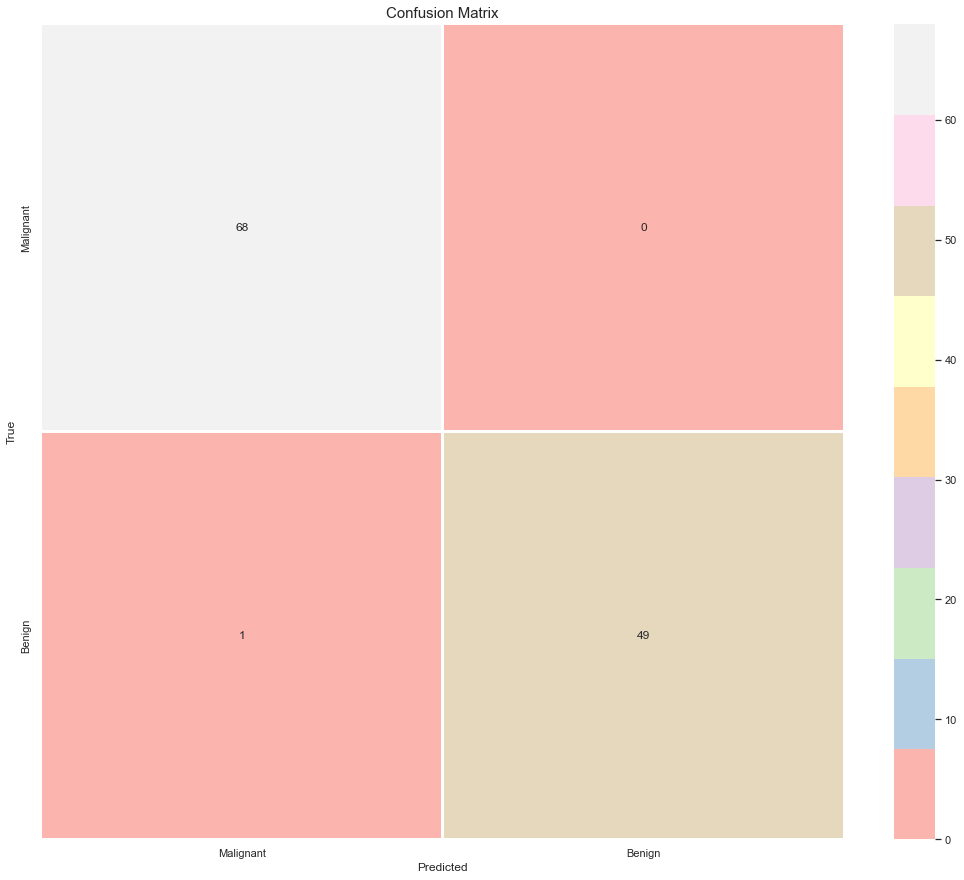

In [88]:
conf_mat = confusion_matrix(y_pred, y_test)
label_class = ["Malignant", "Benign"]
df_conf_mat = pd.DataFrame(conf_mat, index=label_class, columns=label_class)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
Logistic_Regression_accuracy = round(acs(y_test,y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), Logistic_Regression_accuracy) +"% \n")

sns.heatmap(df_conf_mat, annot=True, cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### Support Vector Machine

In [89]:
svm_model = svm.SVC(kernel='rbf', C=1, gamma='auto')

In [90]:
svm_model.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, gamma='auto')

In [91]:
y_pred = svm_model.predict(X_test)

Precision: 0.961 
Recall: 1.0 
F1-Score: 0.98 
Accuracy: 98.31% 



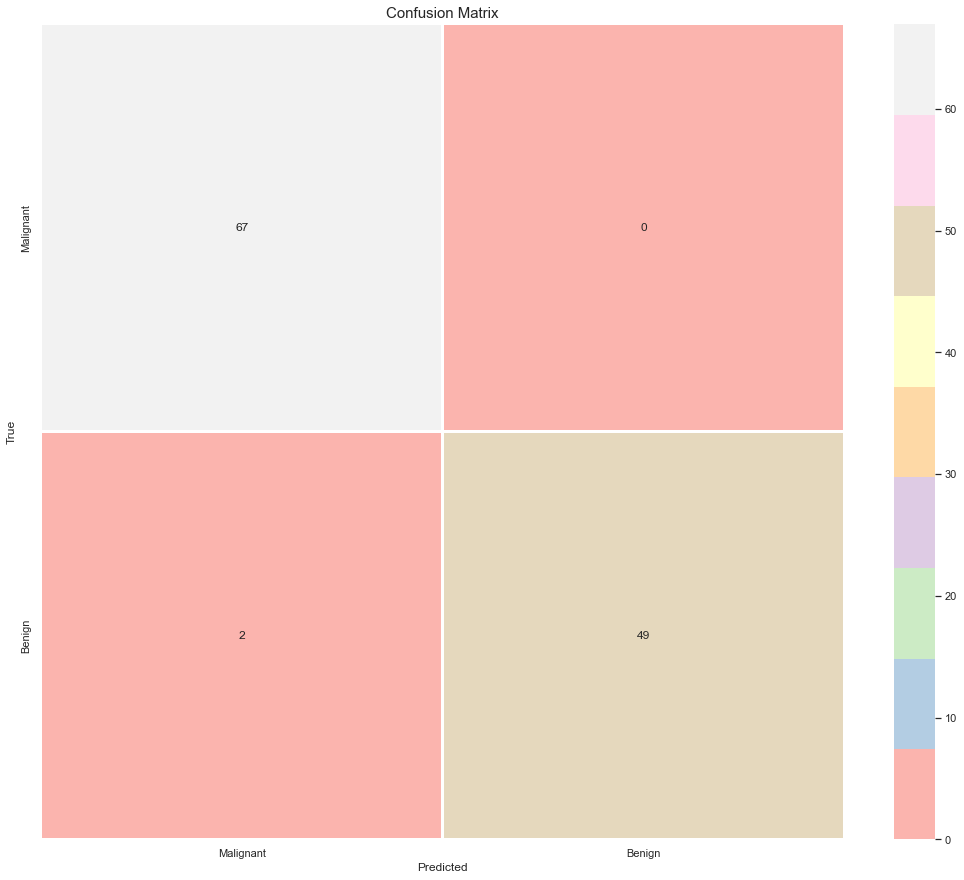

In [92]:
conf_mat = confusion_matrix(y_pred, y_test)
label_class = ["Malignant", "Benign"]
df_conf_mat = pd.DataFrame(conf_mat, index=label_class, columns=label_class)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
SVM_accuracy = round(acs(y_test,y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), SVM_accuracy) +"% \n")

sns.heatmap(df_conf_mat, annot=True, cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [93]:
params = {'C': [0.5, 1, 10],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly']}

In [94]:
g = GridSearchCV(SVC(), params, cv=2)

In [95]:
g.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.5, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']})

In [96]:
print(g.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}


In [97]:
best_params = g.best_params_
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=10, gamma=0.1, kernel='poly')

In [98]:
SVC(kernel = 'poly', C=10, gamma = 0.01)

SVC(C=10, gamma=0.01, kernel='poly')

In [99]:
y_pred = svm_clf.predict(X_test)

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0% 



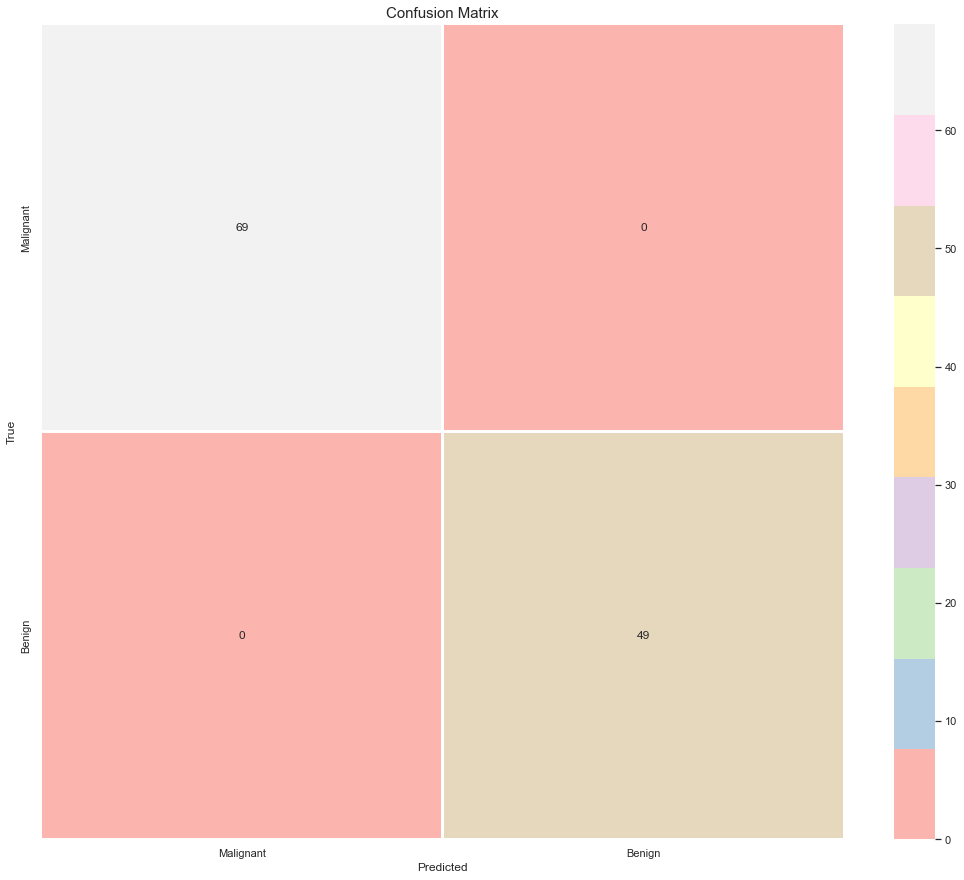

In [100]:
conf_mat = confusion_matrix(y_pred, y_test)
label_class = ["Malignant", "Benign"]
df_conf_mat = pd.DataFrame(conf_mat, index=label_class, columns=label_class)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
SVM_accuracy = round(acs(y_test,y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), SVM_accuracy) +"% \n")

sns.heatmap(df_conf_mat, annot=True, cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### Decision Tree

In [101]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [102]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [103]:
y_pred = dec_tree.predict(X_test)

Precision: 1.0 
Recall: 0.98 
F1-Score: 0.99 
Accuracy: 99.15% 



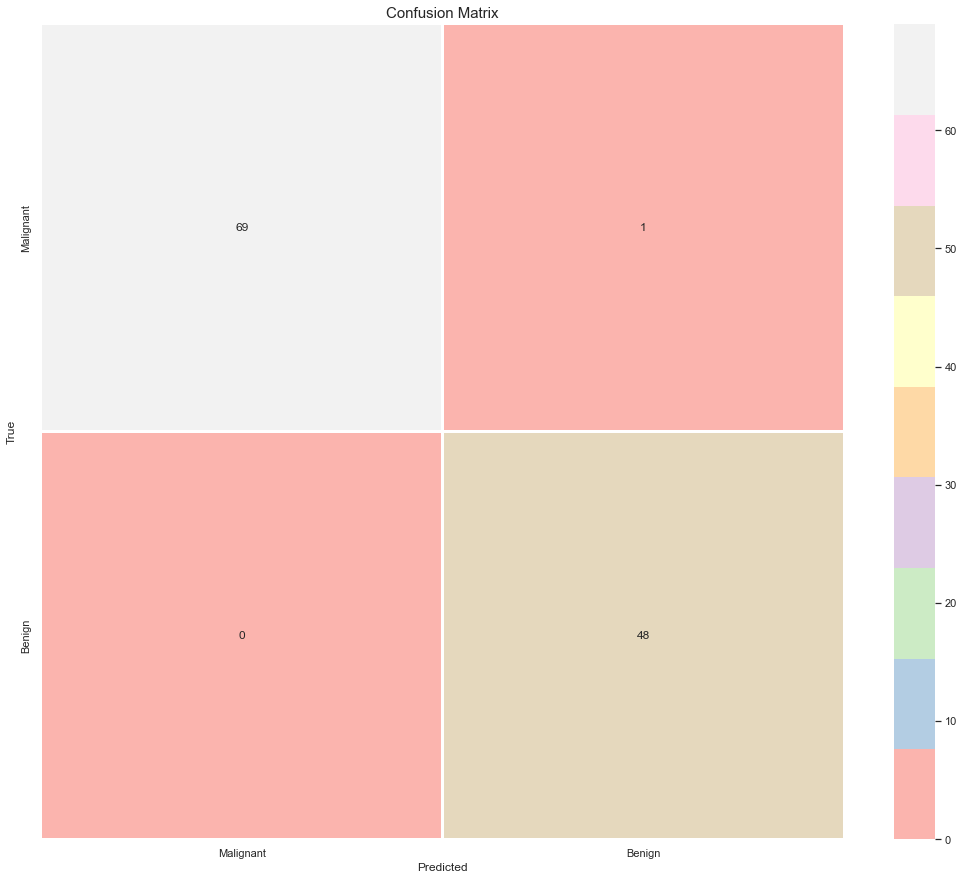

In [104]:
conf_mat = confusion_matrix(y_pred, y_test)
label_class = ["Malignant", "Benign"]
df_conf_mat = pd.DataFrame(conf_mat, index=label_class, columns=label_class)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
DecisionTree_accuracy = round(acs(y_test,y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), DecisionTree_accuracy) +"% \n")

sns.heatmap(df_conf_mat, annot=True, cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### Random Forest

In [105]:
rf_clf = RandomForestClassifier()

In [106]:
rf_clf.fit(X_train, y_train)

<ipython-input-106-152d25007fe9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [107]:
y_pred = rf_clf.predict(X_test)

Precision: 0.979 
Recall: 0.939 
F1-Score: 0.958 
Accuracy: 96.61% 



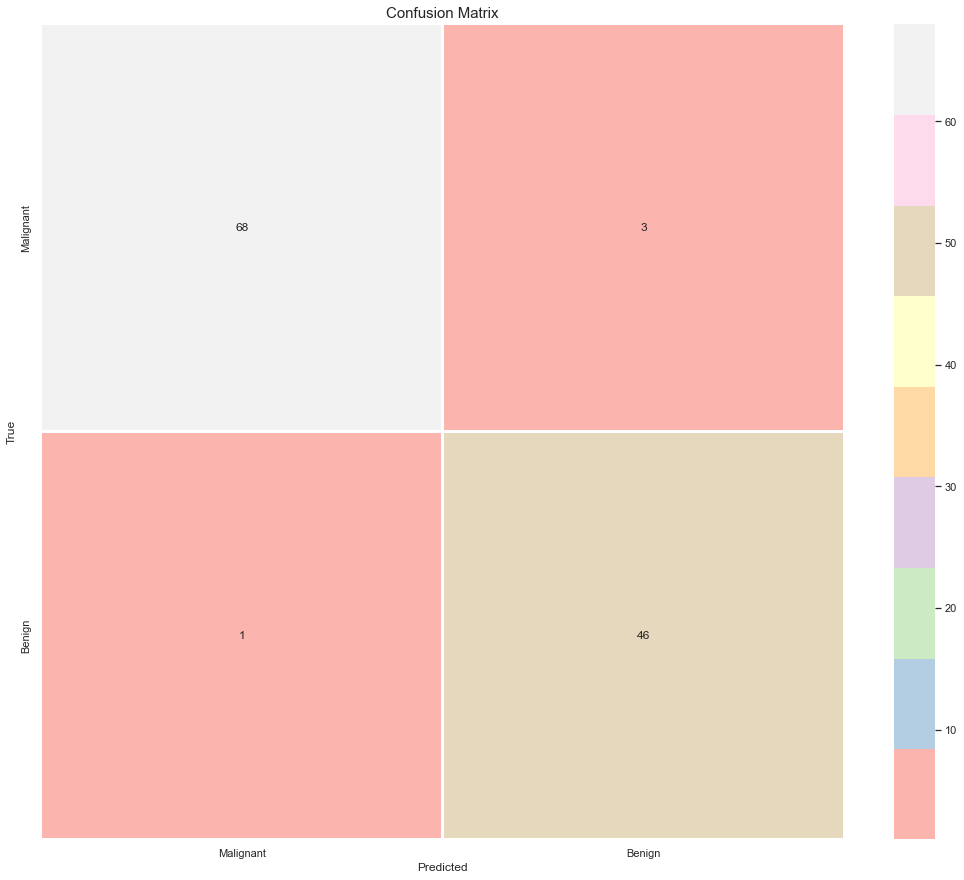

In [108]:
conf_mat = confusion_matrix(y_pred, y_test)
label_class = ["Malignant", "Benign"]
df_conf_mat = pd.DataFrame(conf_mat, index=label_class, columns=label_class)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
RandomForest_accuracy = round(acs(y_test,y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), RandomForest_accuracy) +"% \n")

sns.heatmap(df_conf_mat, annot=True, cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### K-Nearest Neighbor

In [109]:
kkn = KNeighborsClassifier(n_neighbors=10)

In [110]:
kkn.fit(X_train, y_train)

<ipython-input-110-0552e61fb892>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  kkn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [111]:
y_pred = kkn.predict(X_test)

Precision: 0.98 
Recall: 1.0 
F1-Score: 0.99 
Accuracy: 99.15% 



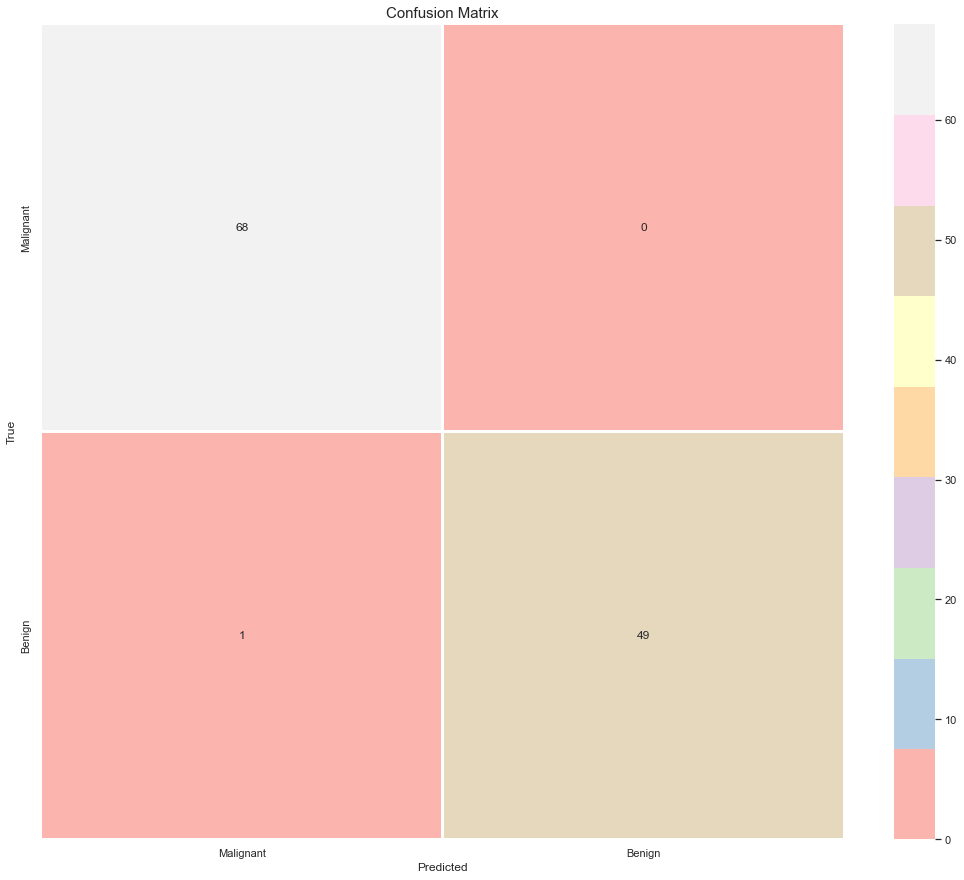

In [112]:
conf_mat = confusion_matrix(y_pred, y_test)
label_class = ["Malignant", "Benign"]
df_conf_mat = pd.DataFrame(conf_mat, index=label_class, columns=label_class)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
KKN_accuracy = round(acs(y_test,y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), KKN_accuracy) +"% \n")

sns.heatmap(df_conf_mat, annot=True, cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Evaluasi
Dengan menggunakan empat buah model diperoleh nilai akurasi sebagai berikut
- Logistic Regression = Precision: 0.98 
Recall: 1.0 
F1-Score: 0.99 
Accuracy: 99.15% 
- Support Vector Machine = Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0% 
- Decision Tree = Precision: 1.0 
Recall: 0.98 
F1-Score: 0.99 
Accuracy: 99.15% 
- Random Forest = Precision: 0.979 
Recall: 0.939 
F1-Score: 0.958 
Accuracy: 96.61% 
- K-Nearest Neighbor = Precision: 0.98 
Recall: 1.0 
F1-Score: 0.99 
Accuracy: 99.15% 

Dengan begitu model yang memiliki tingkat performansi yang tinggi apabila mengacu pada nilai F1-score maka model Support Vector Machine merupakan model yang baik untuk mengklasifikasi kanker payudara pada dataset Wisconsin.